# Nicholas Aspesi: Final Report

In [1093]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col


In [1094]:
dir_path = pd.read_csv('/Users/school/Downloads/report_data.csv')
df = dir_path.copy()


# Table of Contents:


1. Introduction
        a. Size of the Dataset
        b. Columns of the Dataset
        c. Raw Data Description
        d. Values

2. Cleaning Data
        a. Renaming Columns
        b. More Cleaning
        c. Dropping Redundant Columns
        d. Converting Datatypes
        e. Missing Data
        f. Viewing Categories to examine more data
        g. Continued Data Cleaning
        h. Checking for incorrect data

3. Processing Data
        a. Aggregation by Stratification
        b. Percentage of Obesity by Income
        c. Percentage of Obesity by Education Level
        d. Percentage of Obesity by Age Group
        e. Quick Personal Plotting Data
        f. Obesity Rate by Income Group | Regression Line Plot
        g. Obesity Rate by Education Level | Regression Line Plot
        h. Distribution of Obesity Rates
        i. Obesity Rates by Stratification Category
        j. Top 10 States by Avg Obesity Rate

4. Statistical Analysis:
        a. ANOVA
        b. Income Regression
        c. CI Width
        d. Mixed Model


* Disclaimers: I put the majority of my rational and intepretations as I went along, and summarized these for my discussion. 
* This may go past the three minute mark for presentations, but I'd rather have more then not enough. 
* The majority of this work was independently looking at what the data signified, and figuring out a regression.
* I'm going to prepare a script where I answer the presentation questions.


# Introduction

## a. Size of the Dataset

In [1048]:
df.shape ## 104,272 rows by 33 columns

(104272, 33)

### b. Columns of the Dataset

In [1049]:
df.columns ## columns I loaded data set with

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

## c. Raw data description 

* This Data was published by The U.S. Department of Health & Human Services. It is available at Data.gov

* https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system

* Simply put, after I messed around with it, it consists of obesity percentages per state, and demographic stratifications.

* Compiled by random telephone data.


* My general question is: What is the correlation between demographics and obesity?


   
  


## d. Values

In [1050]:
df.dtypes ## These are the data types for each column.

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Sex                            object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

# 2. Cleaning Data

In [1051]:
df = df[(df['YearStart'] >= 2023)] ## Making my Data Set only 2023 (cross-sectional)

In [1052]:
df.shape ## This brings the total size now to 10,780 rows, and 33 columns (90% reduction)

(10780, 33)

## a. Renaming Columns

In [1053]:
df.columns = (
    df.columns
    .str.replace(r'[\W]', '', regex=True)\
    .str.replace(r'(?<!^)([A-Z])', r'_\1', regex=True)\
    .str.replace('__','_')
    .str.lower()
    .str.replace('_i_d','_id')
    .str.replace('ageyears','age')
    .str.replace('1','_1')
)
## Line by Line Analysis:
# Regex 1: Replaces all non-word characters
# Regex 2: Adds an underscore before each uppercase letter, unless it's the beginning of a string
# Line 3: '__' , '_' : Get's rid of the double snake case those that already have it
# Line 4: Finally sets them all to lower after the regex
# Lines 5-8: Handling edge cases and my personal style preferences
df.columns

Index(['year_start', 'year_end', 'location_abbr', 'location_desc',
       'datasource', 'class', 'topic', 'question', 'data_value_unit',
       'data_value_type', 'data_value', 'data_value_alt',
       'data_value_footnote_symbol', 'data_value_footnote',
       'low_confidence_limit', 'high_confidence_limit', 'sample_size', 'total',
       'age', 'education', 'sex', 'income', 'race_ethnicity', 'geo_location',
       'class_id', 'topic_id', 'question_id', 'data_value_type_id',
       'location_id', 'stratification_category_1', 'stratification_1',
       'stratification_category_id_1', 'stratification_id_1'],
      dtype='object')

## 2. More cleaning

In [1054]:
## lets check if year_start and year_end are exactly the same,
df['year_end'].equals(df['year_start'])

True

In [1055]:
## since this is true, we don't really need either because we know we set the year to 2023 correctly

In [1056]:
df.drop(['year_end','year_start'], axis=1, inplace = True) 
## removes year_end column, axis=1 specifies its a column, inplace specifies to modify the existing dataframe
df

,location_abbr,location_desc,datasource,class,topic,question,data_value_unit,data_value_type,data_value,data_value_alt,...,geo_location,class_id,topic_id,question_id,data_value_type_id,location_id,stratification_category_1,stratification_1,stratification_category_id_1,stratification_id_1
93492,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,31.1,31.1,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q044,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
93493,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,67.4,67.4,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q043,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
93494,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,62.5,62.5,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q043,VALUE,2,Income,"$25,000 - $34,999",INC,INC2535
93495,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.8,35.8,...,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,VALUE,2,Education,High school graduate,EDU,EDUHSGRAD
93496,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,63.2,63.2,...,"(64.84507995700051, -147.72205903599973)",PA,PA1,Q043,VALUE,2,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104267,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,31.7,31.7,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,High school graduate,EDU,EDUHSGRAD
104268,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,32.4,32.4,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Age (years),65 or older,AGEYR,AGEYR65PLUS
104269,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,22.5,22.5,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,Data not reported,INC,INCNR
104270,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,35.6,35.6,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q046,VALUE,56,Education,Less than high school,EDU,EDUHS


## 2. Cleaning Data


In [1057]:

## BRFSS doesn't change so lets drop that 
## location ID does not seem important for our purposes either, 
## data_value_type is has no characters,
## originally I removed geo_location since its just coordinates, but I want to see if maybe I can do a geospatial analysis as well when i'm plotting

df.drop(['datasource'], axis=1, inplace = True) 



In [1058]:
wheres_my_data = df.isna().mean() * 100  # i'm checking to see what data is missing
print(wheres_my_data.sort_values(ascending=False))

## to continue cleaning my analysis lets start by dropping columns with the most empty columns

data_value_unit                 100.000000
total                            96.428571
sex                              92.857143
data_value_footnote_symbol       88.042672
data_value_footnote              88.042672
education                        85.714286
age                              78.571429
income                           75.000000
race_ethnicity                   71.428571
high_confidence_limit            11.957328
sample_size                      11.957328
low_confidence_limit             11.957328
data_value_alt                   11.957328
data_value                       11.957328
geo_location                      1.818182
topic_id                          0.000000
data_value_type_id                0.000000
location_id                       0.000000
stratification_category_1         0.000000
stratification_1                  0.000000
stratification_category_id_1      0.000000
question_id                       0.000000
location_abbr                     0.000000
class_id   

In [1059]:
## these aren't important, geo_location is all coordinates, don't have the hard skills to do any sort of 3d visual
df.drop(['total','data_value_unit','geo_location'],axis=1, inplace=True)

In [1060]:
df.sort_values(by=['data_value'], ascending=True)

df = df[df['stratification_category_1'] != 'Total'] 

df.nunique() ## any column that has only 1 unique value I'm going remove since I don't assume its important, regardless it would be true to all variables anyway

location_abbr                     55
location_desc                     55
class                              2
topic                              2
question                           7
data_value_type                    1
data_value                       651
data_value_alt                   651
data_value_footnote_symbol         1
data_value_footnote                1
low_confidence_limit             658
high_confidence_limit            685
sample_size                     3369
age                                6
education                          4
sex                                2
income                             7
race_ethnicity                     8
class_id                           2
topic_id                           2
question_id                        7
data_value_type_id                 1
location_id                       55
stratification_category_1          5
stratification_1                  27
stratification_category_id_1       5
stratification_id_1               27
d

## 2. Dropping Redundant Columns
* I analyzed and looked at each, these are all unneeded for our analysis
* They're either empty, duplicates, or meta_data and not useful

In [1061]:
df.drop([
    'data_value_footnote_symbol',
    'data_value_footnote', 
    'data_value_type_id', 
    'data_value_type',
    'location_id',
    'location_abbr',
    'data_value_alt',
    'class_id',
    'topic_id',
    'question_id',
    'stratification_category_id_1',
    'stratification_id_1',
    'topic'], axis=1, inplace=True)

## I know what the warning means, but I didn't have this problem before...

/var/folders/0h/lv0h7c3n5v5g28z757gx2kj40000gp/T/ipykernel_45055/3314519578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([


In [1062]:
df.columns ## new columns

Index(['location_desc', 'class', 'question', 'data_value',
       'low_confidence_limit', 'high_confidence_limit', 'sample_size', 'age',
       'education', 'sex', 'income', 'race_ethnicity',
       'stratification_category_1', 'stratification_1'],
      dtype='object')

## 2. Converting DataTypes | Converting Objects to Categories

In [1063]:
df = df.astype({x: 'category' for x in df.select_dtypes(['object']).columns})
              

## Creates a dict of column names, iterates through DF, selects objects and replaces them with category
## This loop makes the most sense to me, since it's just interating through the returned series to print the data types
## sample_size is only int's, I could use the nullable int casting, but I want to look at the na data first

In [1064]:
df.dtypes ## worked sucessfully, maybe there was an easier way but this made more sense to me

location_desc                category
class                        category
question                     category
data_value                    float64
low_confidence_limit          float64
high_confidence_limit         float64
sample_size                   float64
age                          category
education                    category
sex                          category
income                       category
race_ethnicity               category
stratification_category_1    category
stratification_1             category
dtype: object

# 2. Missing Data

In [1065]:
df.isna().sum() ## listing data, the first four are my target variables and seem correlated

location_desc                   0
class                           0
question                        0
data_value                   1275
low_confidence_limit         1275
high_confidence_limit        1275
sample_size                  1275
age                          8085
education                    8855
sex                          9625
income                       7700
race_ethnicity               7315
stratification_category_1       0
stratification_1                0
dtype: int64

## 2. Viewing Categories for Personal NA Data Analysis

In [1066]:
for col in df.select_dtypes( 
    include=["category"]).columns: ## selects all category data types from columns
    print(f"Categories for '{col}':\n{df[col].cat.categories}\n{'_'*100}" ## prints them, with '_' acting as a divider
)

    ## Iterates through the data types to find each columns list of categories. 
    ## The F-String formats it by adding a line break after each iteration,
    ## '_' in this instance i'm using to improve readibility so I can easily see each one
    ## *100 is just a personal preference to print an underscore to act as a line divider
    ## The purpose of this is so I can see each category, and make sure I understand exactly explanations of null data represent
    
    ## By doing this I learned that missing demographic data (age,education,sex,income,race_ethnicity) is by design
    ## Each row signifies one single stratification, I'll keep stratification_category for now for brevity
    ## this might seem bombastic but it helped me visualize and understand the data without having to google.

Categories for 'location_desc':
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'National', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
____________________________________________________________________________________________________
Categories for 'class':
Index(['Obesity / Weight Status', 'Physical 

In [1067]:
df = df.drop(['education','sex','income','race_ethnicity','age'], axis=1).reset_index(drop=True)
## all of these are included in stratification_category, 
## they're rife with missing data, can see myself getting confused fast so I'm just going drop them

# 2. Continued Data Cleaning

In [1068]:
df.isna().sum() ## Now we've removed redundant columns, we only need to worry about the missing data from here

location_desc                   0
class                           0
question                        0
data_value                   1275
low_confidence_limit         1275
high_confidence_limit        1275
sample_size                  1275
stratification_category_1       0
stratification_1                0
dtype: int64

In [1069]:
df = df.dropna().reset_index(drop=True) ## dropping NA, and resetting the index to eliminate any gaps 
## I figured out that these only impacted specific ethnic groups, most likely from small sample size
## this is one of the reasons I based my regressions off other variables, as I knew that ethnicity would have an implicit bias
## data collection is self reported survey calling, the ones with most missing data we're geographically remote

In [1070]:
## Now that we've understood and dropped the missing data from sample_size, we can can convert it to int

df['sample_size'] = pd.to_numeric(df['sample_size']).astype(int) 

print(df.dtypes)

## using this way to handle edge cases on floats just incase, ran into issues with it before, found this fixed it
## compared values before and after no issues

location_desc                category
class                        category
question                     category
data_value                    float64
low_confidence_limit          float64
high_confidence_limit         float64
sample_size                     int64
stratification_category_1    category
stratification_1             category
dtype: object


## 2. Checking for incorrect Data:
* I'm fairly conident thers no incorrect data, just to be sure I'll do some quick logical checks.
* I won't overcomplicate this because my past analysis didn't seem out of the ordinary
* Logically i'm just going check our target variables

In [1071]:
df[ 
    (df['data_value'] > 100) |  
    (df['data_value'] < 0) | 
    (df['sample_size'] <= 1) | 
    ~((df['data_value'] > df['low_confidence_limit']) & (df['data_value'] < df['high_confidence_limit']))
]
## Lines 1-2: Making sure data_value isn't greater than 100 or less than 0
## Line 3: sample size isn't less than or equal to 0
## Line 4: if data_value isn't included then it proves true and will print it any values that fall out the bounds of the confidence level

,location_desc,class,question,data_value,low_confidence_limit,high_confidence_limit,sample_size,stratification_category_1,stratification_1


### Since no Data was printed, we can assume all of the information is relatively correct

### Finally, since we have so much data, let's just focus on obesity

In [2]:
obesity = df[
    (df['class'] == 'Obesity / Weight Status') &
    (df['question'] == 'Percent of adults aged 18 years and older who have obesity')
]

## sorting by class, question, there are lots these are more important
## before this I had too much data to wrap my head around, simplified it to obesity instaed of obesity and overweight,
## obesity has more clinical health implications, so I feel it's more important to foucs on.

NameError: name 'df' is not defined

In [1]:
obesity.shape

NameError: name 'obesity' is not defined

In [1074]:
obesity = obesity.reset_index(drop=True)
## resetting index, had a rough time trying to group tables when I forgot to do this and drop the original.

# 3. Data Processing:

##  Aggregation by Stratification:

In [1075]:

strat_col = 'stratification_category_1'
strat_subcol = 'stratification_1'

## i didn't want to have to hard code
## made some quick percentage charts because I wanted to see soft data
## grouping by stratification, the function with right input sorts by it
## renaming is just formatting table
## .dropna dropped the rest of the data, sorting it made the rest null, only shows what i want now
## observed=True in groupby was to get rid of a warning

def dynamic_aggregate(category: str):
    return (
        obesity[obesity[strat_col] == category]
        .groupby(strat_subcol, observed=True)['data_value']
        .agg(['mean', 'std', 'count'])
        .rename(columns={'mean': 'Obesity (%)', 'std': 'Std Dev', 'count': 'Samples'})
        .dropna()
    )
## variables for tables
income_obesity = dynamic_aggregate('Income')
education_obesity = dynamic_aggregate('Education')
age_obesity = dynamic_aggregate('Age (years)')

## B. Percentage of Obesity by Income

In [1076]:
income_obesity ## if everythings right then the lowest income has the highest obesity rate.

,Obesity (%),Std Dev,Samples
stratification_1,,,
"$15,000 - $24,999",36.703774,5.298329,53
"$25,000 - $34,999",36.801887,4.836778,53
"$35,000 - $49,999",35.667925,4.255168,53
"$50,000 - $74,999",35.475472,4.344533,53
"$75,000 or greater",34.524528,4.408903,53
Data not reported,30.647170,4.194942,53
"Less than $15,000",37.945283,6.015383,53


## C. Percentage of Obesity by Education Level

In [1077]:
education_obesity ## higher education seems to correlate with less obesity, interesting that theres not a big difference
## between less than high school and some college. Or maybe I did it wrong.

,Obesity (%),Std Dev,Samples
stratification_1,,,
College graduate,28.945283,4.664537,53
High school graduate,35.183019,3.255453,53
Less than high school,36.424528,5.101467,53
Some college or technical school,36.266038,4.210789,53


## D. Percentage of Obesity by Age Group

In [1078]:
age_obesity ## anecdoctally this makes sense.

,Obesity (%),Std Dev,Samples
stratification_1,,,
18 - 24,20.975472,3.960862,53
25 - 34,33.552830,5.761230,53
35 - 44,36.915094,5.444772,53
45 - 54,40.177358,4.631026,53
55 - 64,38.952830,4.846395,53
65 or older,30.432075,3.862381,53


# E. Quick Personal Visual Plotting Data

In [1079]:
income_obesity_plot = (
obesity[obesity['stratification_category_1'] == 'Income']
.groupby('stratification_1',observed=True)['data_value']
.mean()
.sort_index()
.dropna()
)

## searching through obesity columns, finding the category income, then assosciating the related categorical keys with stratification
## finally comparing to data value, I could've used .agg but this is just for a comparison.

## I just copied and pasted each for simple plot data
## similar to before but I had some issues so I wanted to fix it


edu_obesity_plot = (
obesity[obesity['stratification_category_1'] == 'Education']
.groupby('stratification_1',observed=True)['data_value']
.mean()
.sort_index()
.sort_values(ascending=False)
.dropna()
)



age_obesity_plot = (
obesity[obesity['stratification_category_1'] == 'Age (years)']
.groupby('stratification_1',observed=True)['data_value']
.mean()
.sort_index()
.sort_values(ascending=False)
.dropna()
)



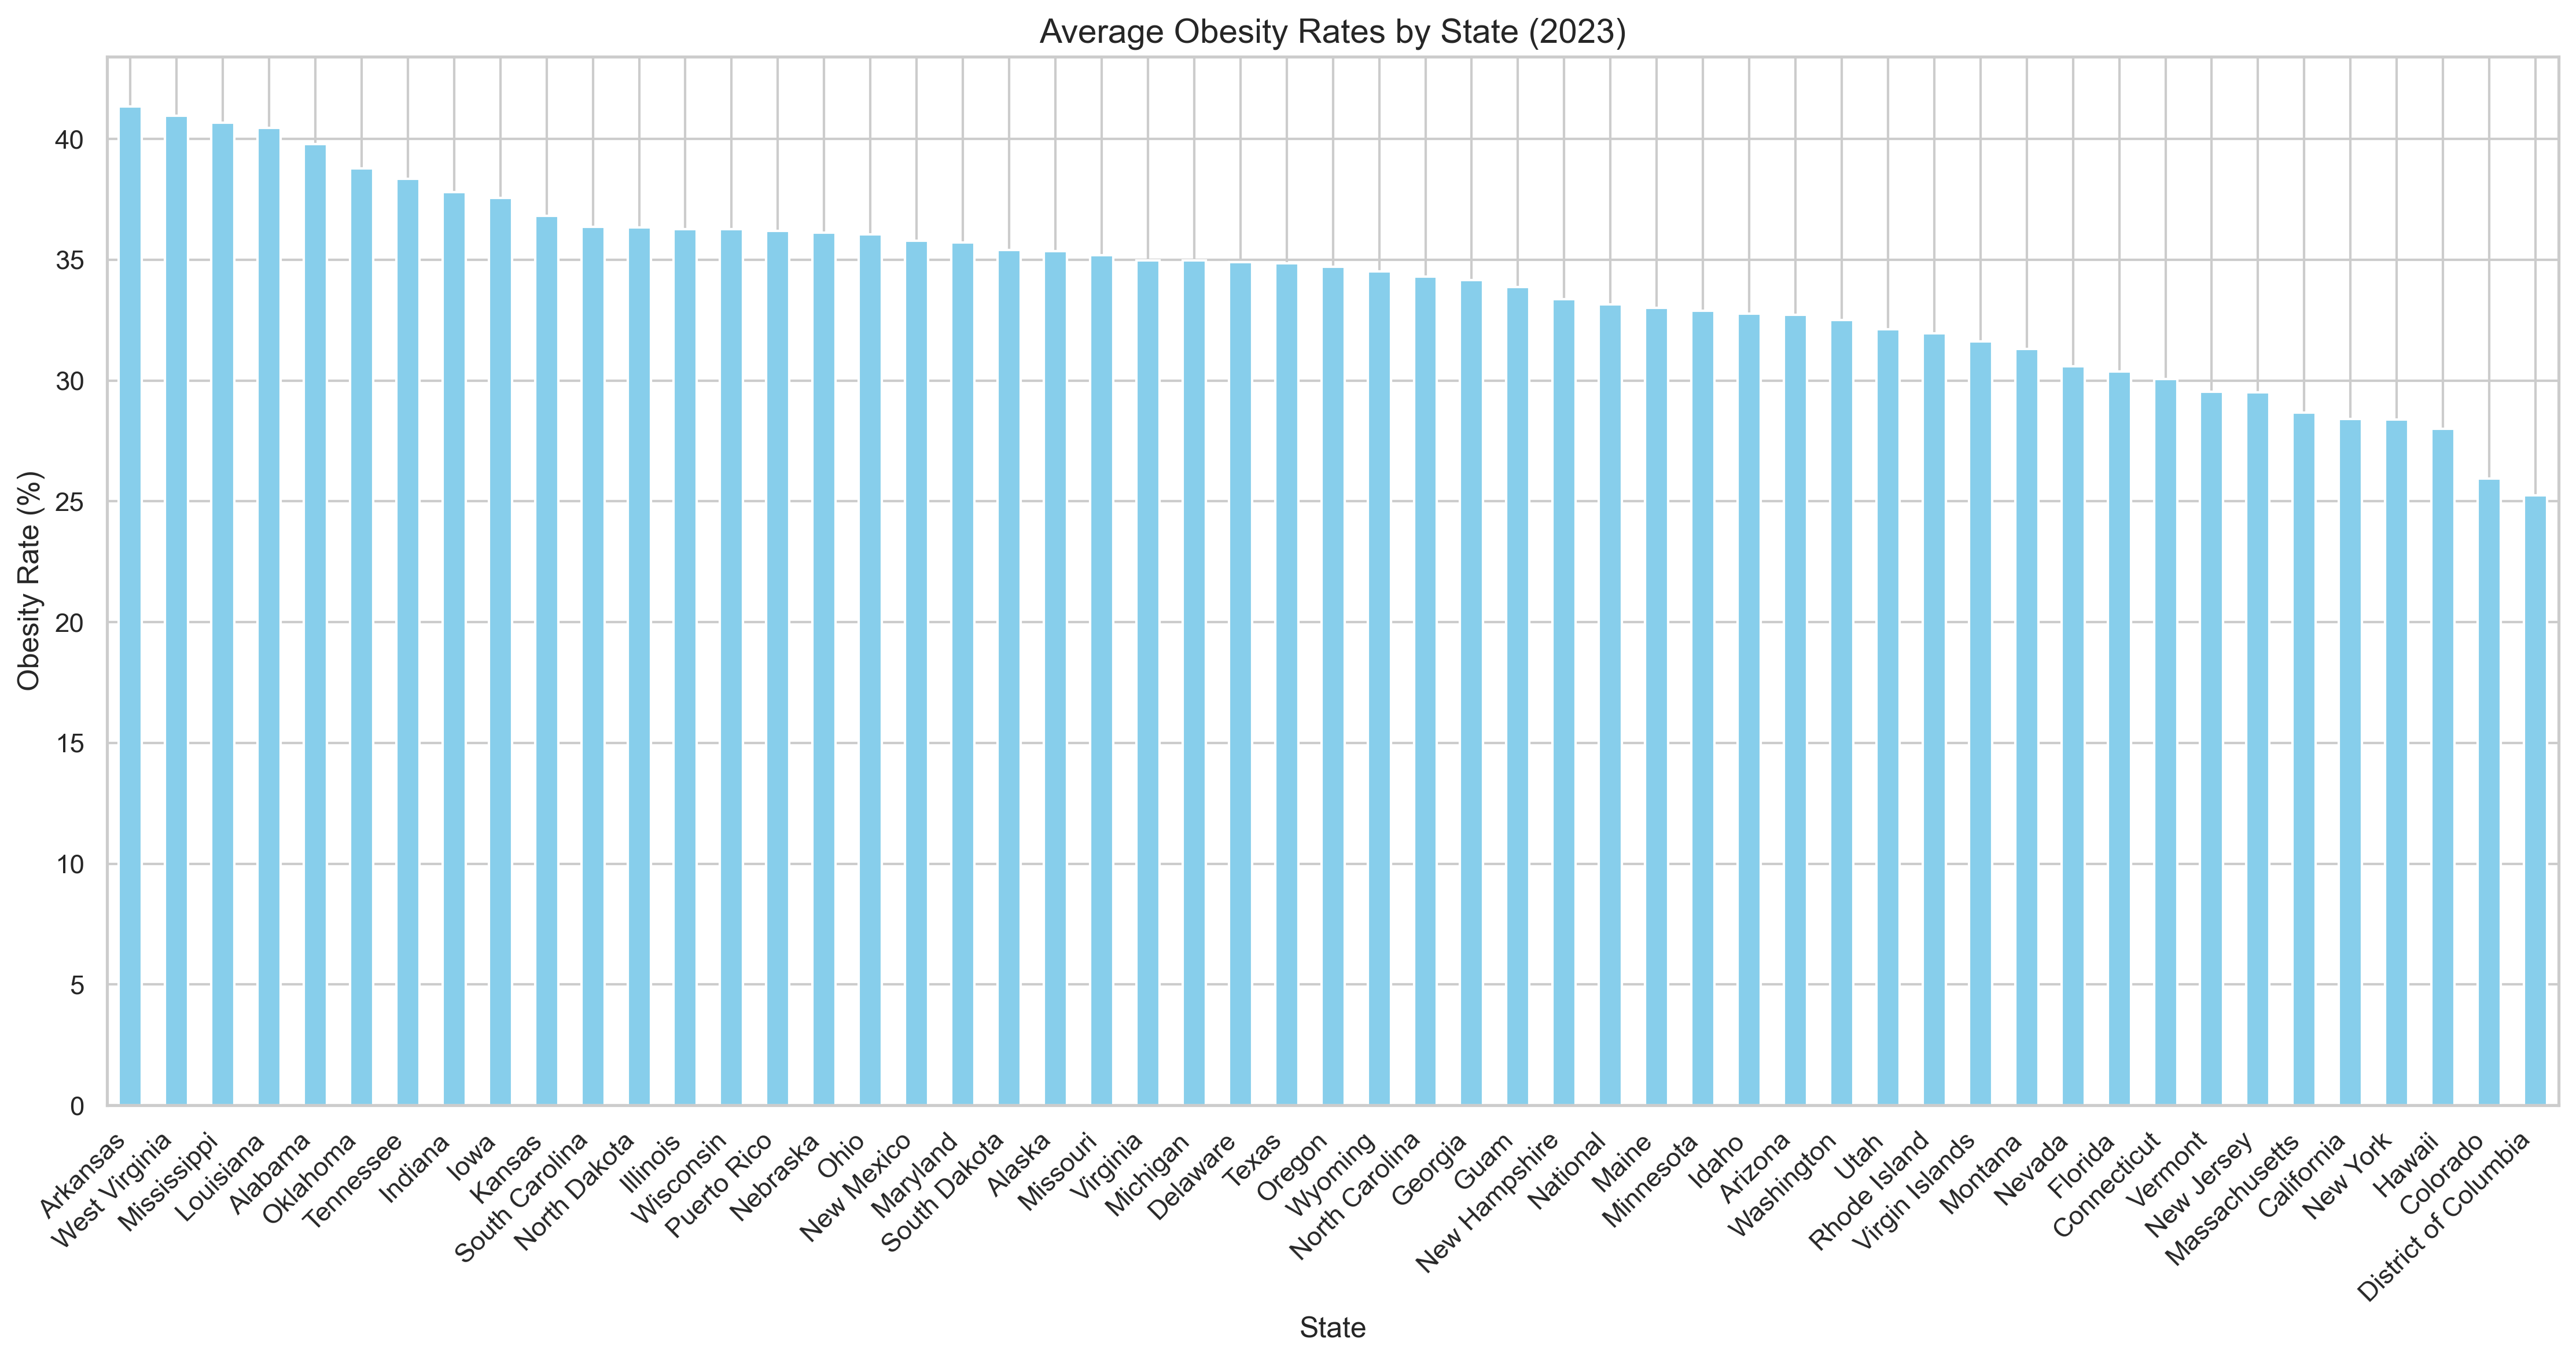

In [1080]:
state_avg_plot = obesity.groupby('location_desc', observed=True)['data_value'].mean().sort_values(ascending=False)

## originally I deleted this but it's a cool comparison to authenticate my analysis.

plt.figure(figsize=(15, 8))
state_avg_plot.plot(kind='bar', color='skyblue')
plt.title('Average Obesity Rates by State (2023)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Obesity Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## this is just a summary of every state obesity level for my own reference

### F. Obesity Rate by Income Group | Regression Line Plot

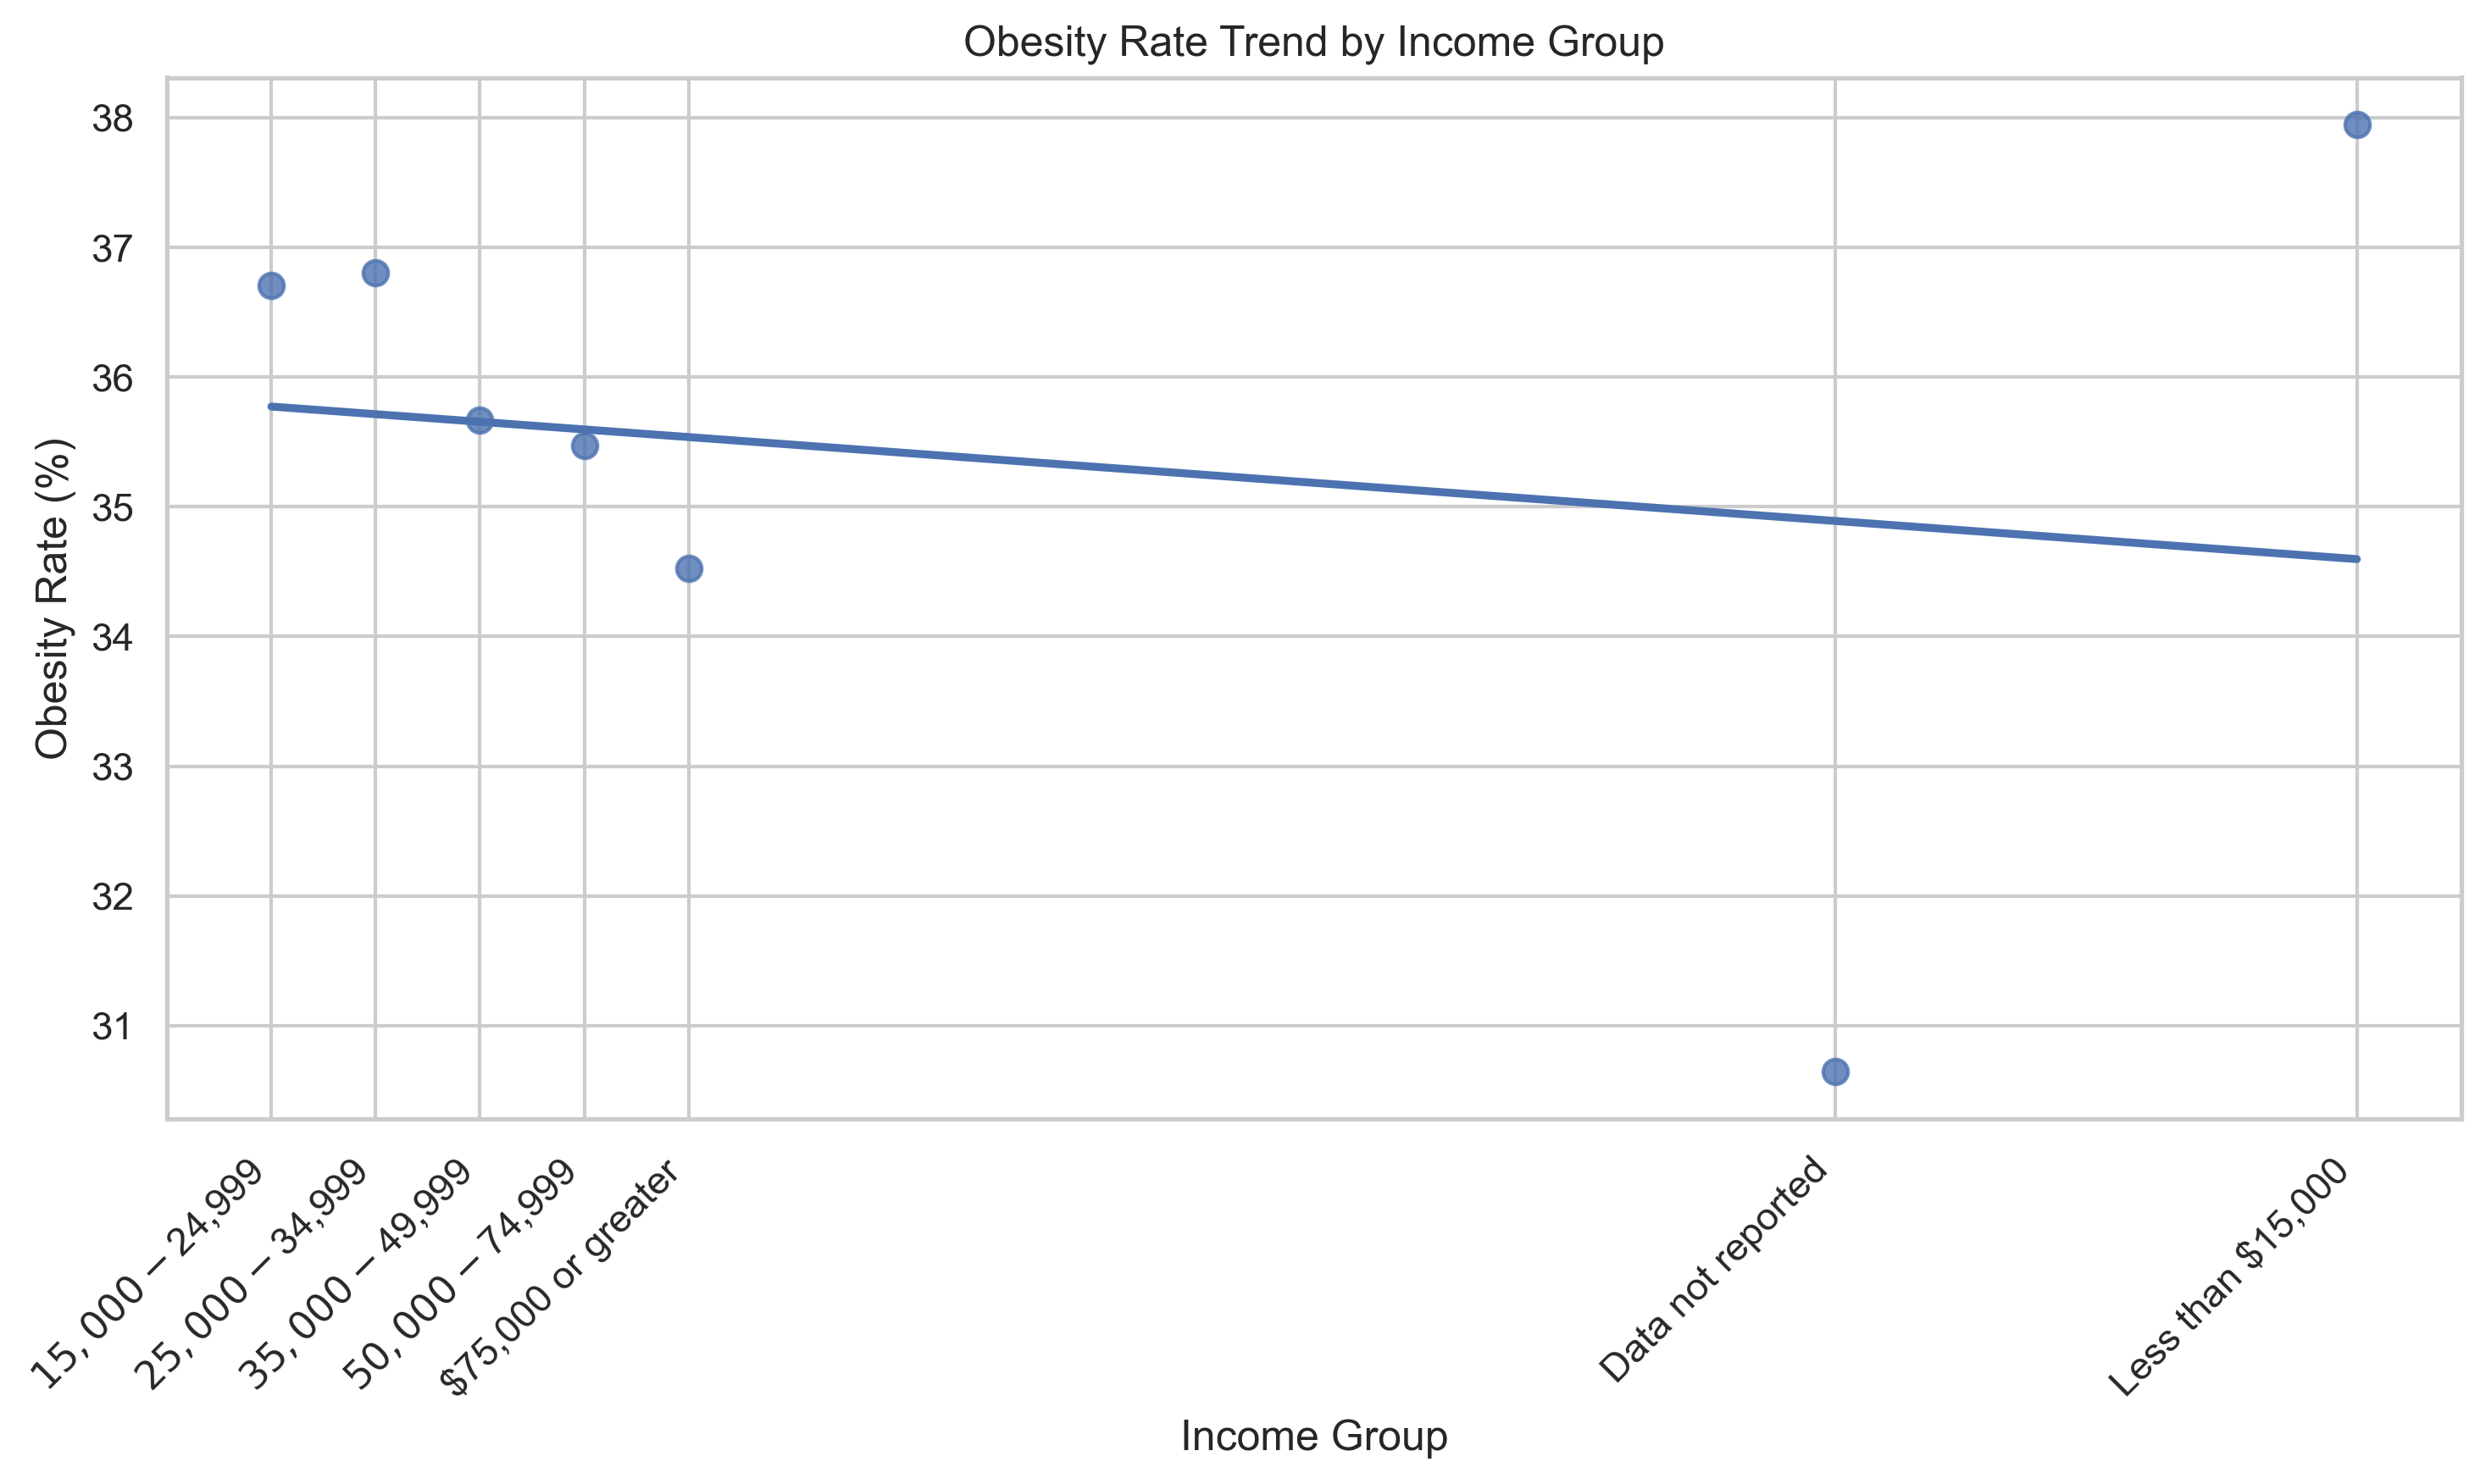

In [1081]:
# Income Regression Plot
plt.figure(figsize=(10, 6))
df_income = income_obesity_plot.reset_index()
df_income['income_code'] = pd.Categorical(df_income['stratification_1']).codes
sns.regplot(x='income_code', y='data_value', data=df_income, ci=None, scatter_kws={'s': 50})
plt.title('Obesity Rate Trend by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Obesity Rate (%)')
plt.xticks(ticks=df_income['income_code'], labels=df_income['stratification_1'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## again for my own reference, I didn't sort it properly 
## to sort it properly I could've broken apart the category made a new dataframe 
## then input everything into their own columns and plotted that
## I just wanted a rough visual analysis for myself to understand the relation, so I didn't strive for perfection
## however this will back up my analysis shortly

### G. Obesity Rate by Education Level

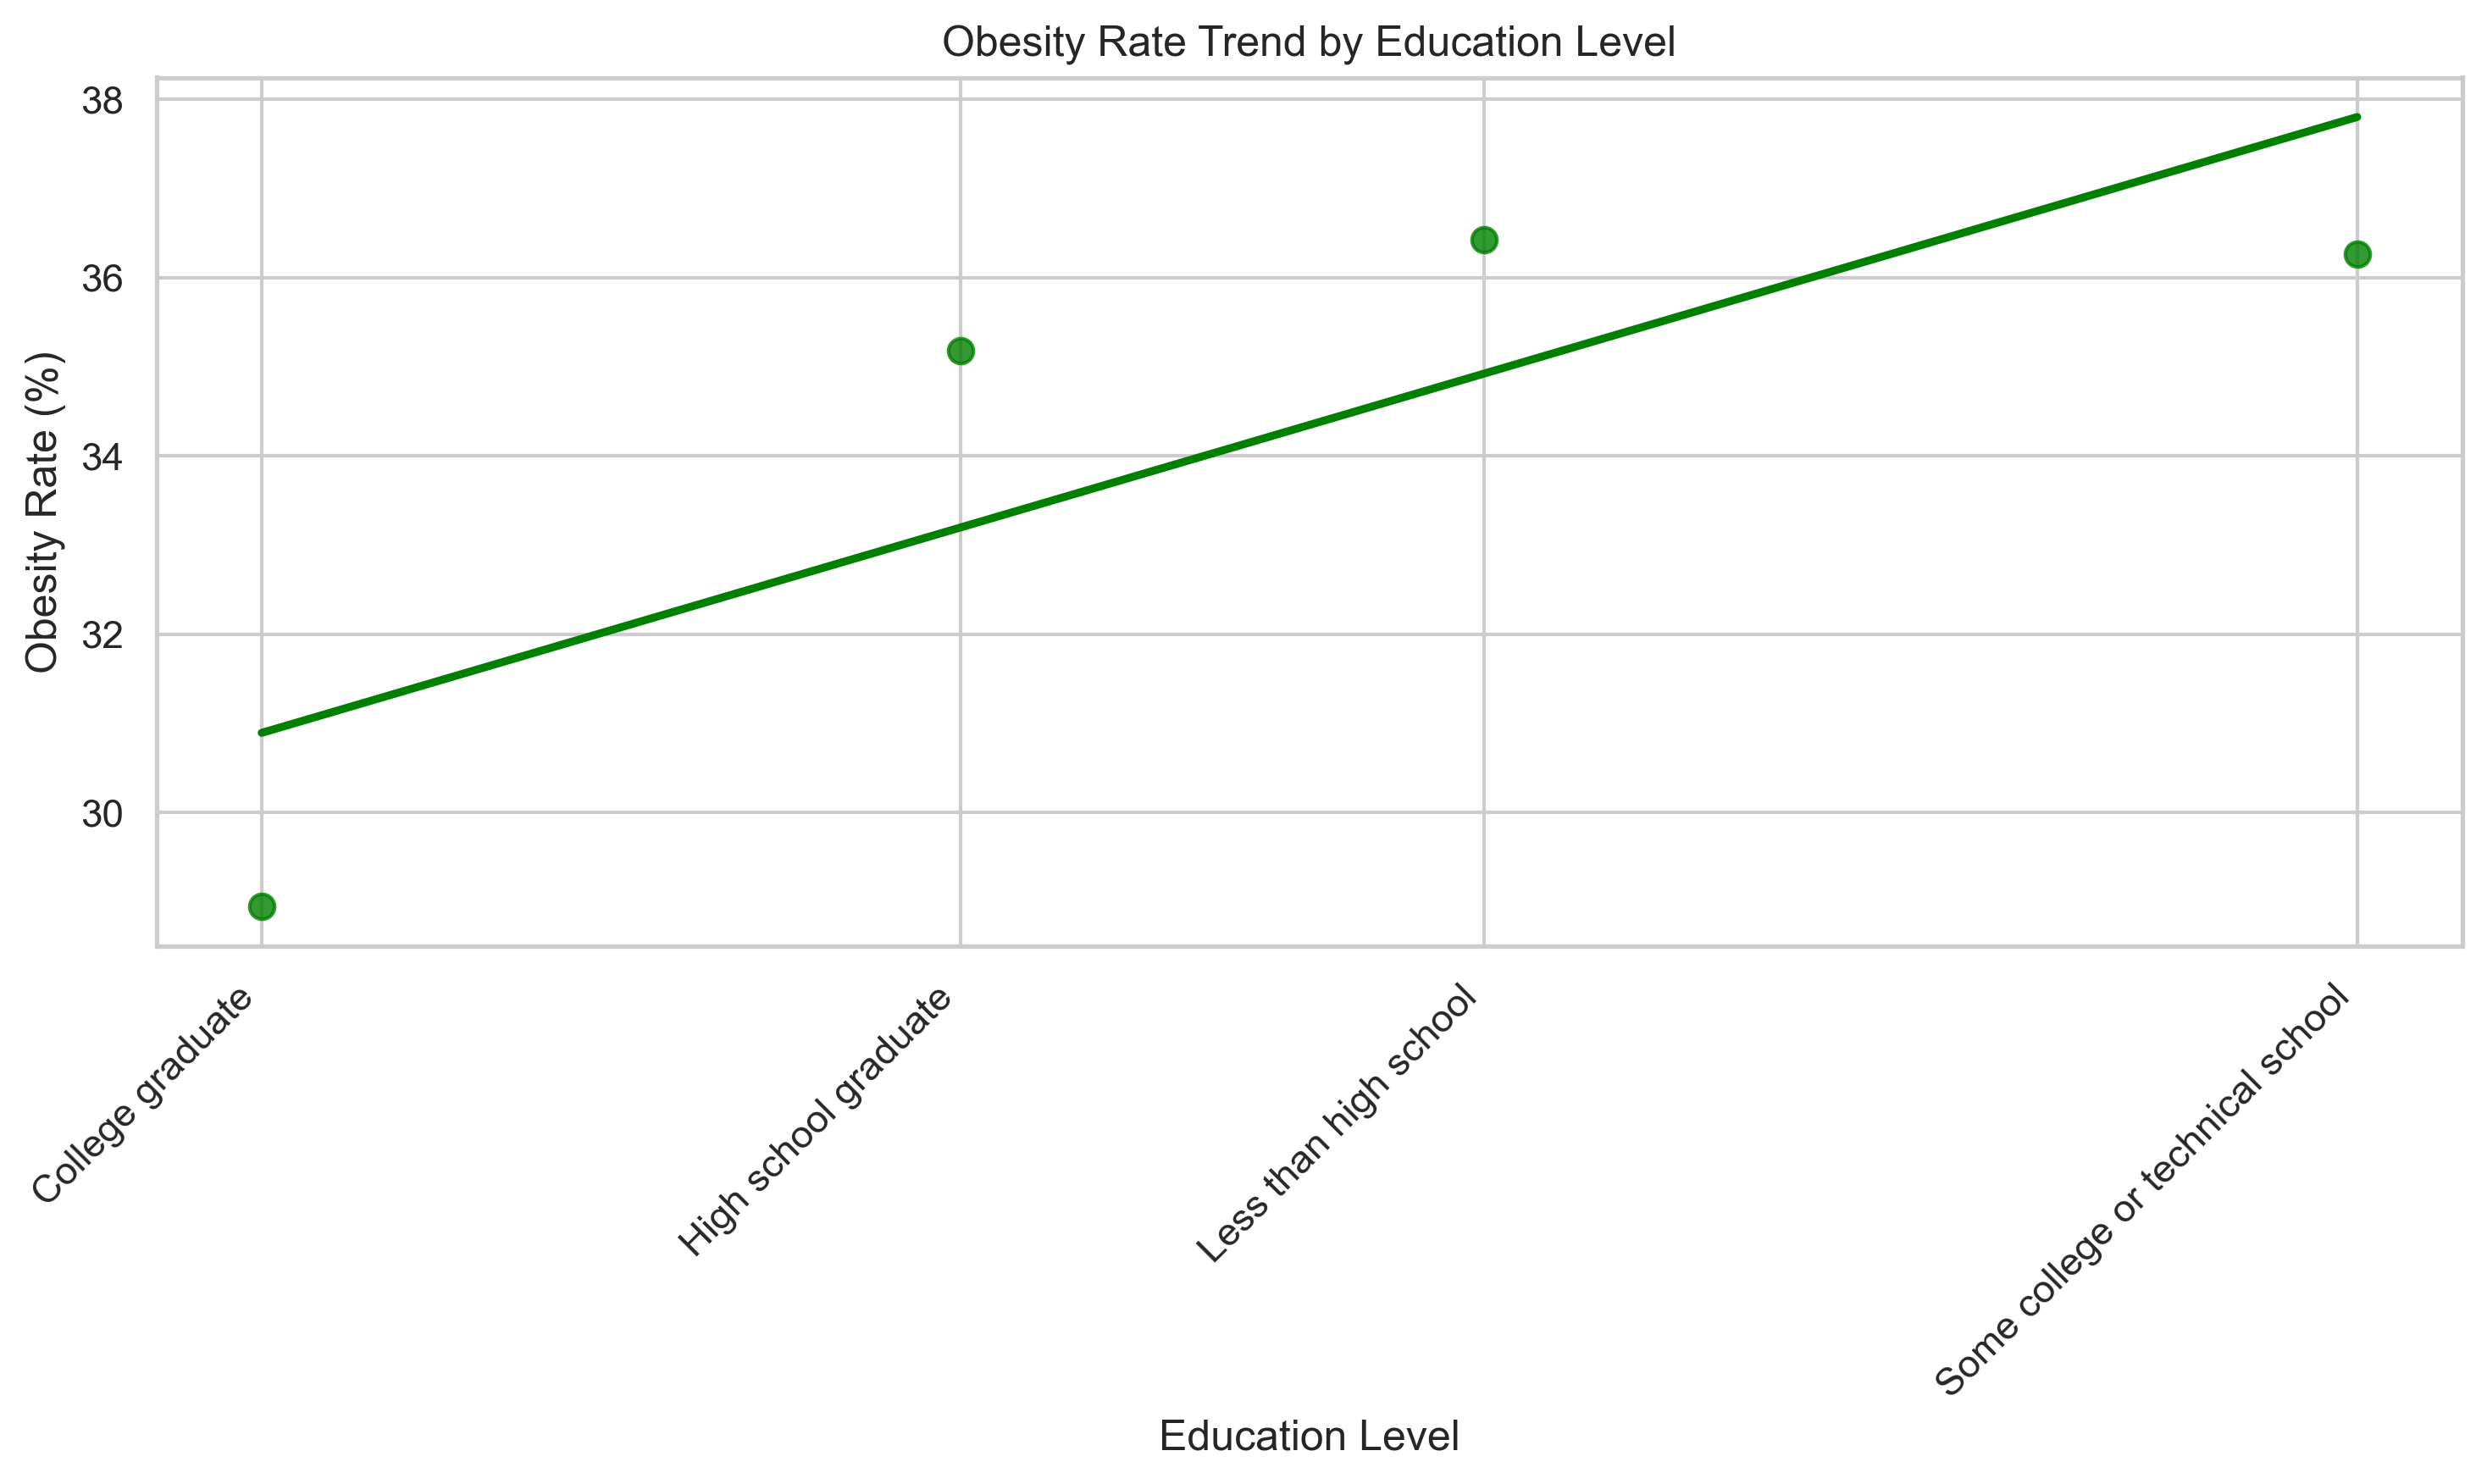

In [1082]:
# Education Regression Plot
plt.figure(figsize=(10, 6))
df_edu = edu_obesity_plot.reset_index()
df_edu['edu_code'] = pd.Categorical(df_edu['stratification_1']).codes
sns.regplot(x='edu_code', y='data_value', data=df_edu, ci=None, color='green', scatter_kws={'s': 50})
plt.title('Obesity Rate Trend by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Obesity Rate (%)')
plt.xticks(ticks=df_edu['edu_code'], labels=df_edu['stratification_1'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## smaller sample size
## again my own reference, didn't sort it properly, same as before
## it's sorted better I suppose

# H. Distribution of Obesity Rates

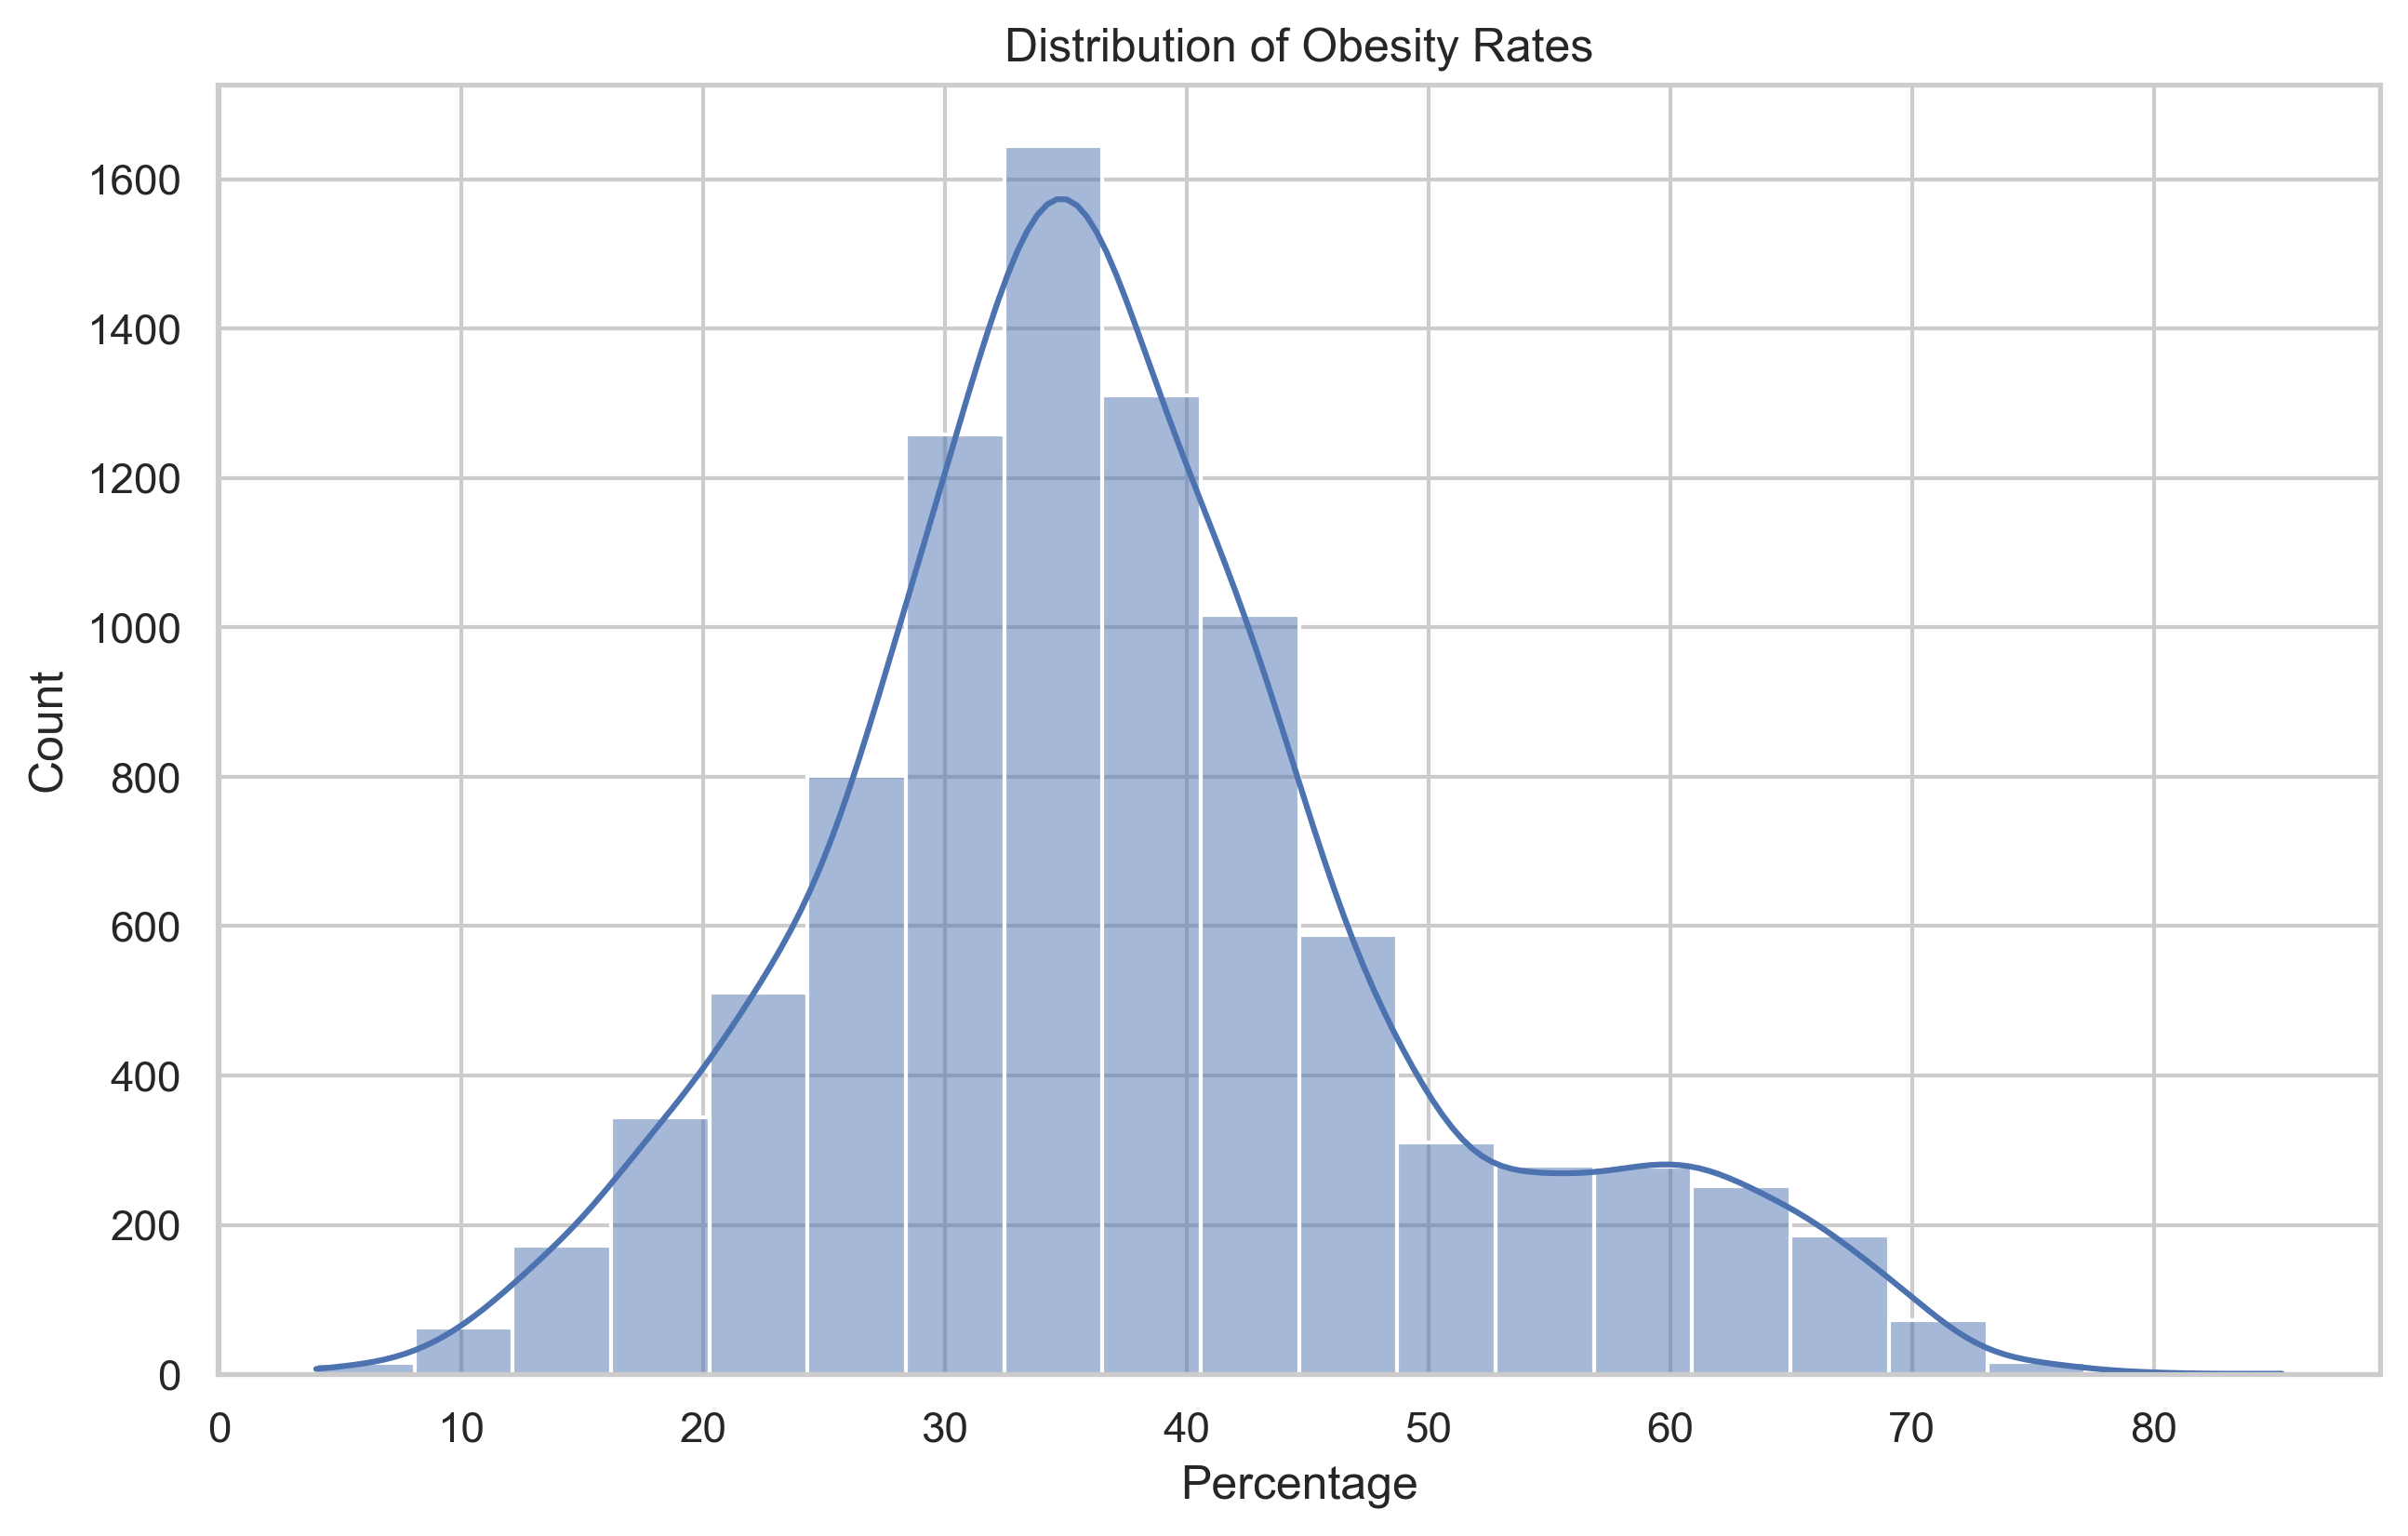

In [1083]:
plt.figure(figsize=(10, 6))
sns.histplot(df['data_value'], kde=True, bins=20)
plt.title('Distribution of Obesity Rates')
plt.xlabel('Percentage')
plt.show()

## looking to see the distribution of obesity rates across the whole filtered data set
## macro-distribution, more holistic 
## the mean and bell-curve seem to be around what I googled to double check, so that looks good.

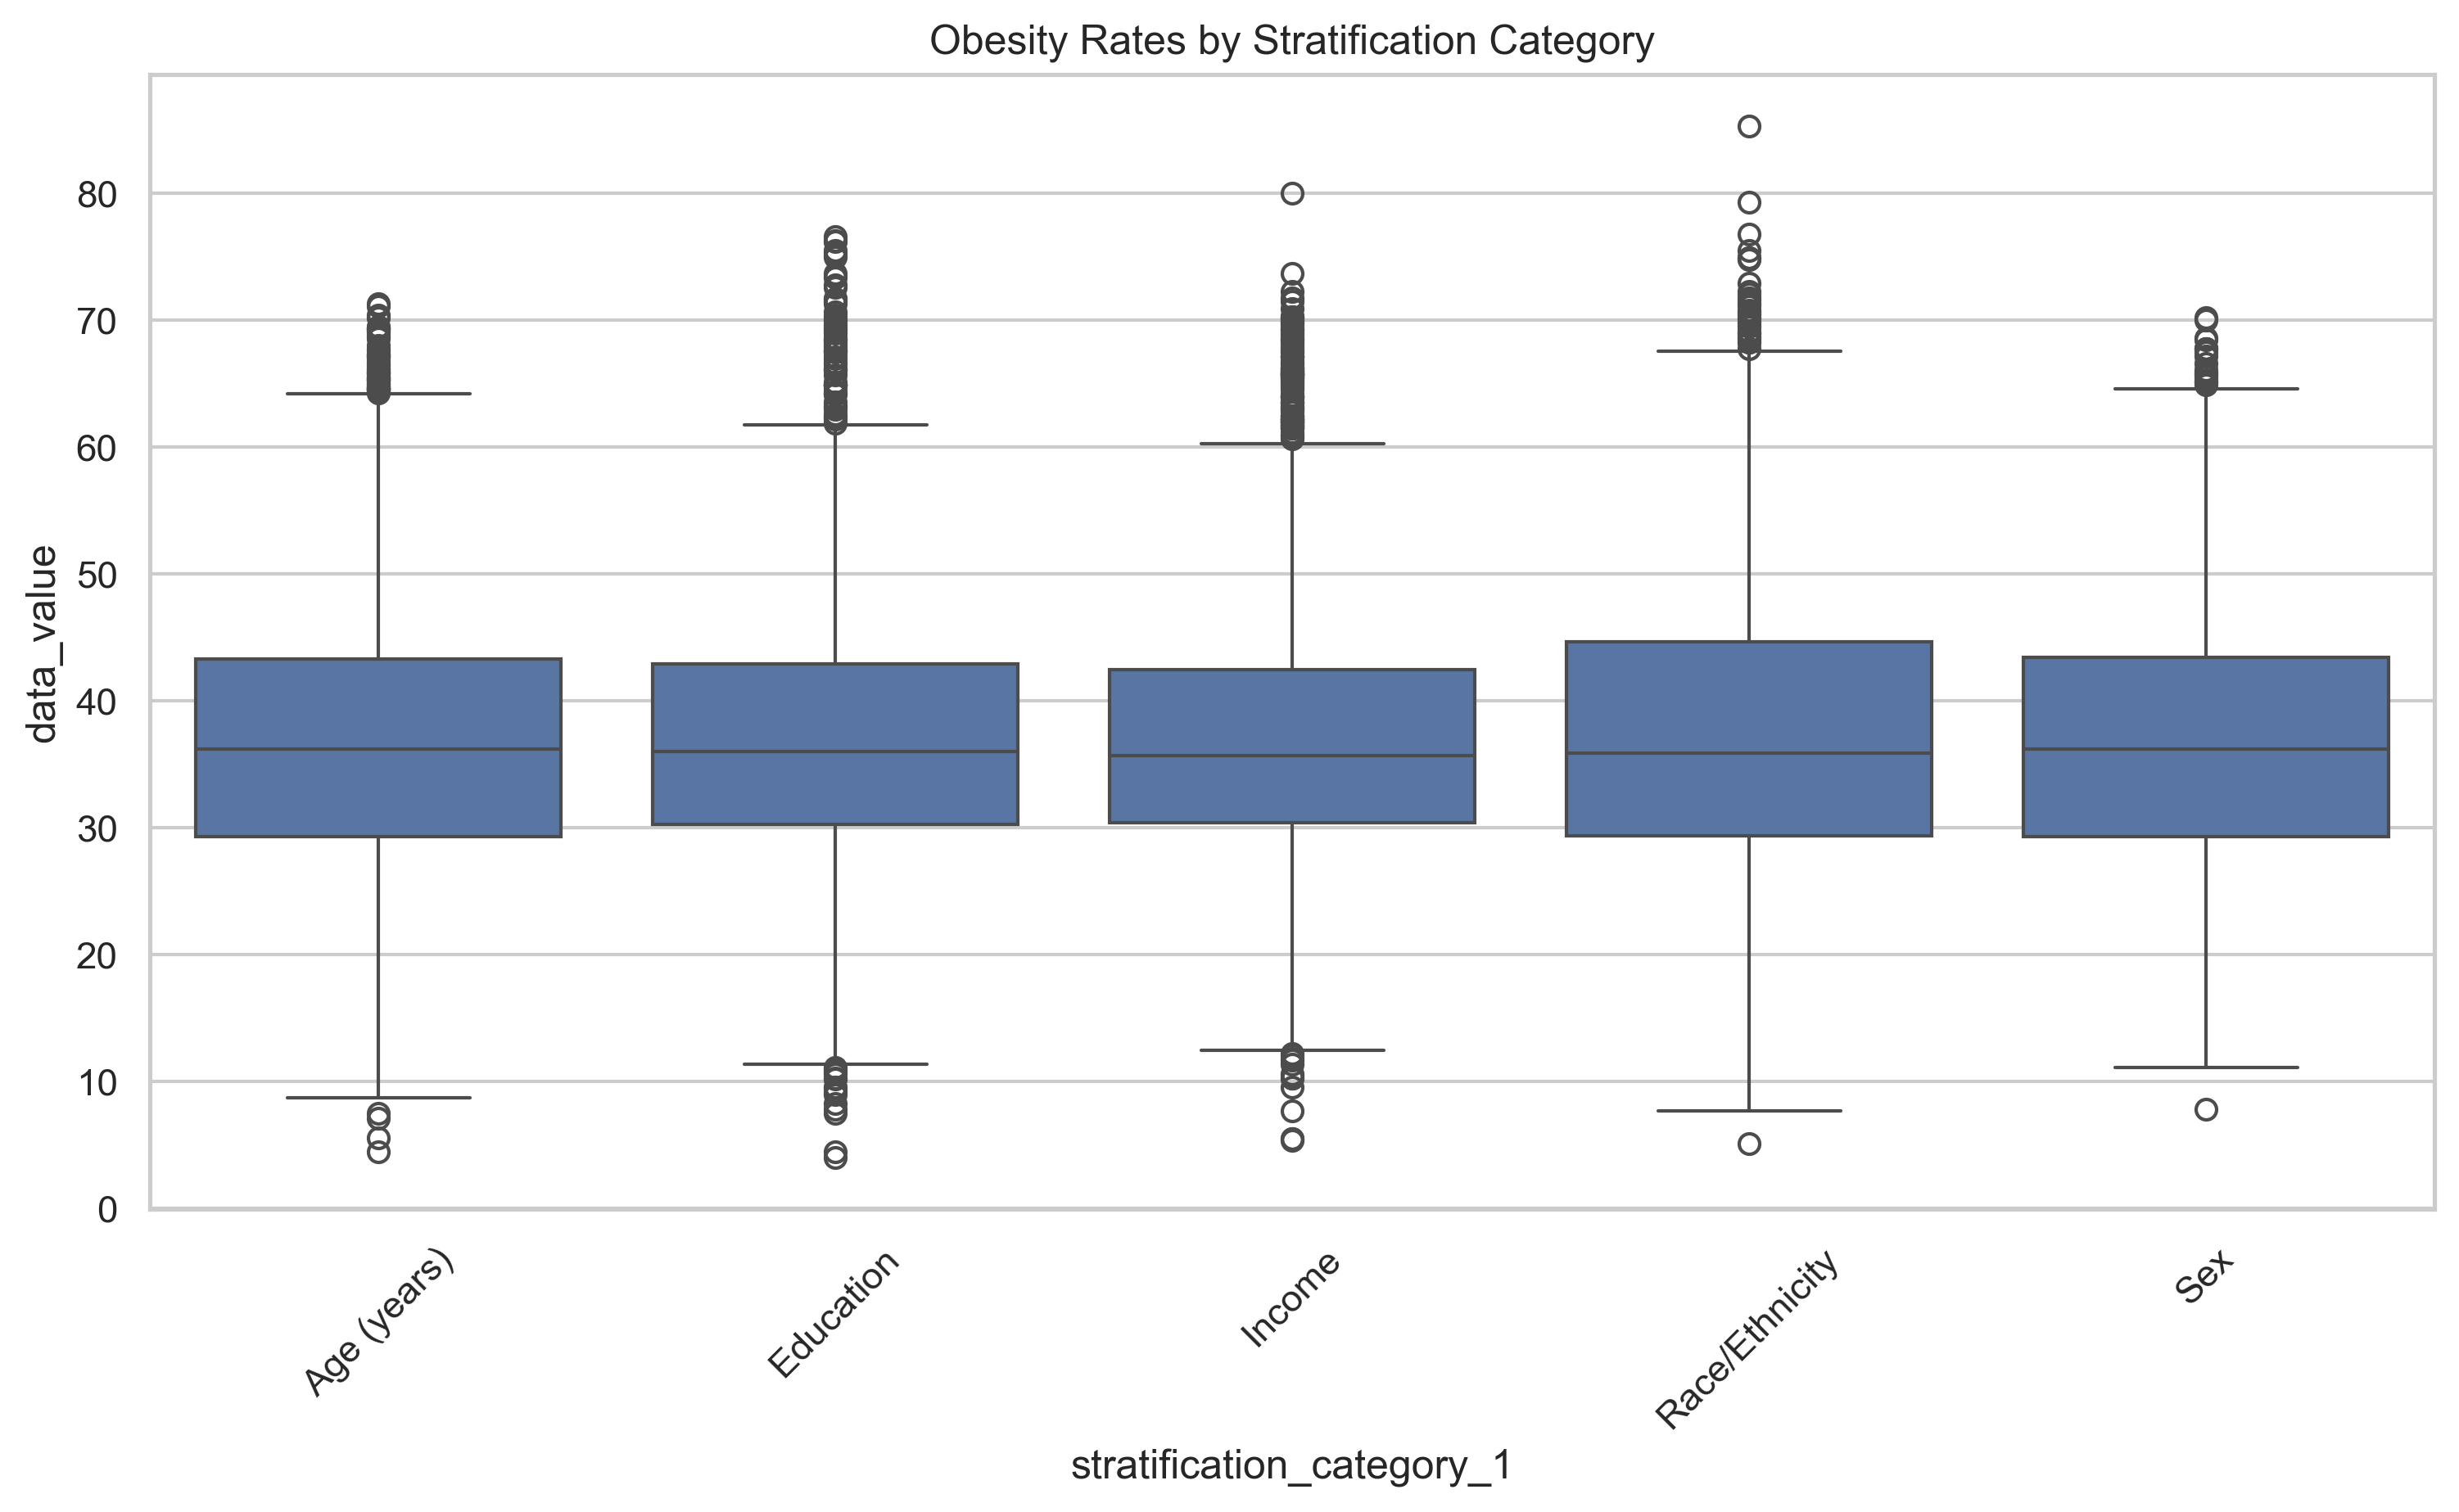

In [1084]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stratification_category_1', y='data_value', data=df)
plt.title('Obesity Rates by Stratification Category')
plt.xticks(rotation=45)
plt.show()

## then I plotted them by stratification category
## I wanted to look and see the differences,
## obviously different but mean is fairly similar
## race/ethnicity has more variation, could have something todo with the impacted sample size and the implicit bias from null data
## income seems to have the least variation.

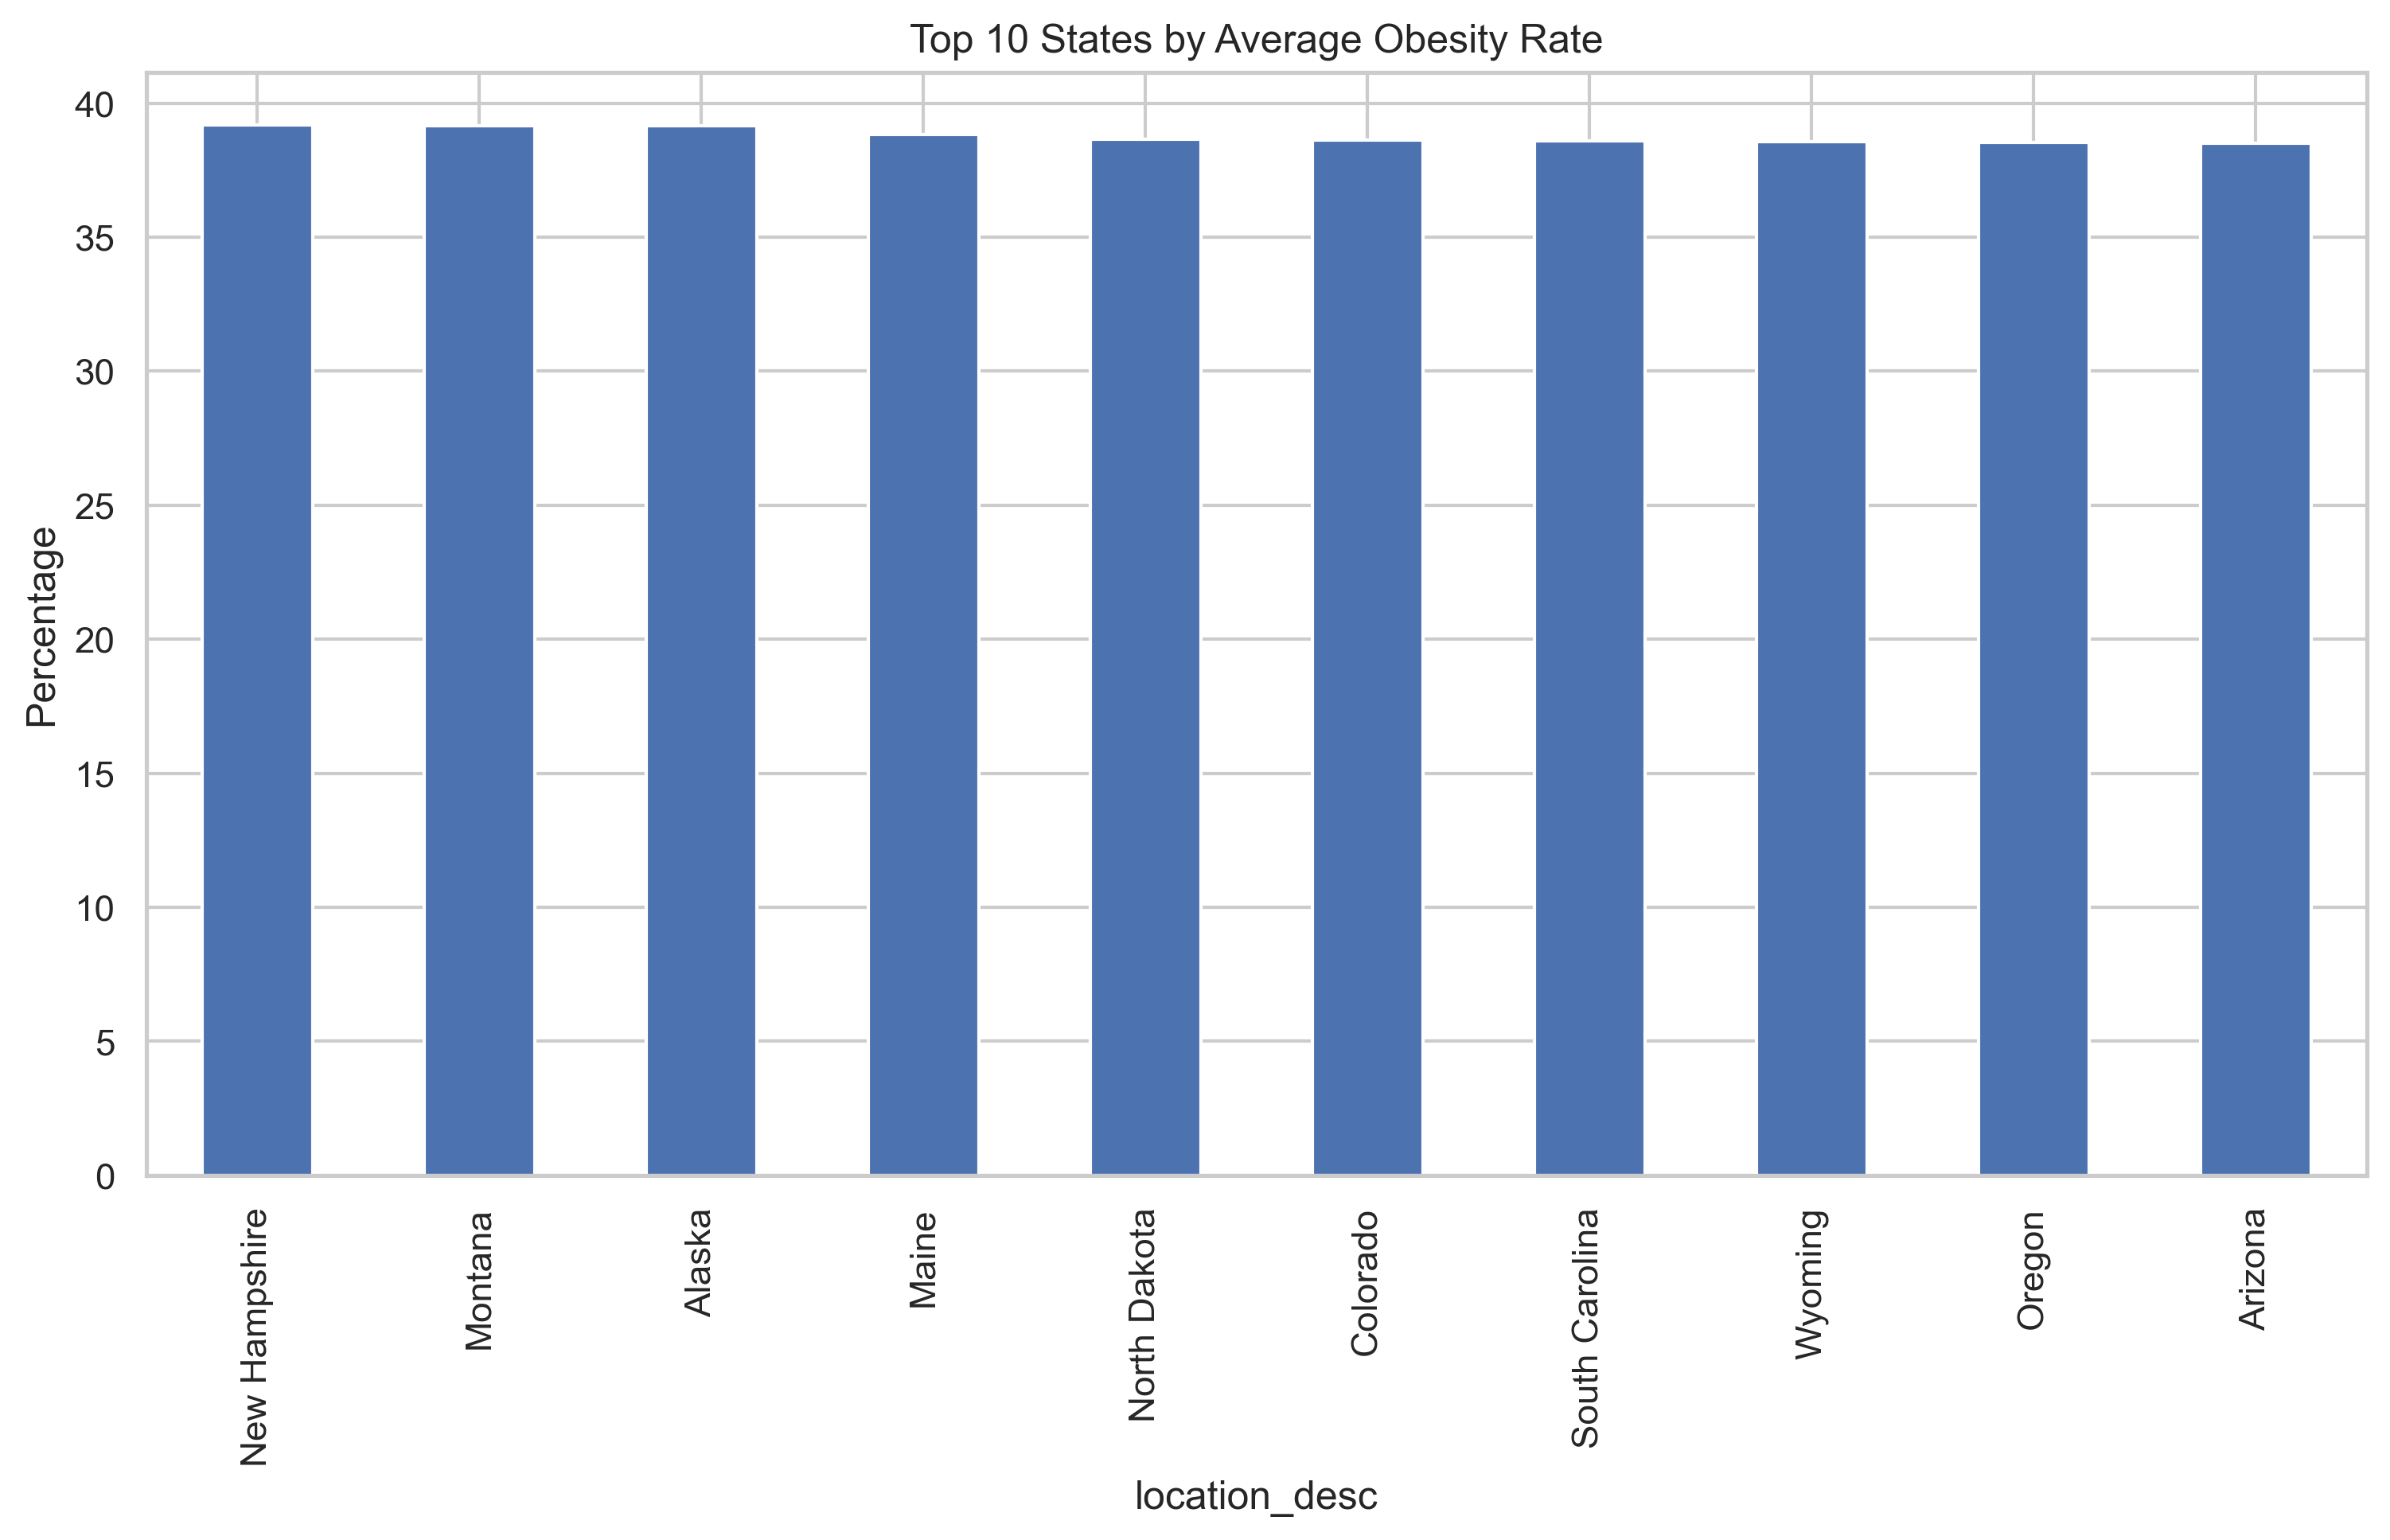

In [1085]:
state_means = df.groupby('location_desc',observed=True)['data_value'].mean().sort_values(ascending=False)
state_means[:10].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 States by Average Obesity Rate')
plt.ylabel('Percentage')
plt.show()
## finally I wanted to see what avg obesity rate looked like thru different states
## this was also somewhat to look at my validity of data
## all relatively close, but each is different.

# 4. Statistical Analysis


In [1086]:
model = ols('data_value ~ C(stratification_category_1)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
## depdendent variable is obesity percentage
## 0.322 P-value means we fail to reject null hypothesis
## I think since it's looking at all of them, others get buried
## even though it wasn't significant I wanted to show factors like income can still show relations

                                    sum_sq      df         F    PR(>F)
C(stratification_category_1)  6.872382e+02     4.0  1.167391  0.322989
Residual                      1.341490e+06  9115.0       NaN       NaN


Interpretation:
To interpret specific differences I should analyze indiviual stratifications, (income,education)
No statistically significant differences in obesity rates across the broad demographic categories

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.212
Date:                Sun, 20 Apr 2025   Prob (F-statistic):            0.00764
Time:                        09:09:36   Log-Likelihood:                -953.58
No. Observations:                 318   AIC:                             1919.
Df Residuals:                     312   BIC:                             1942.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

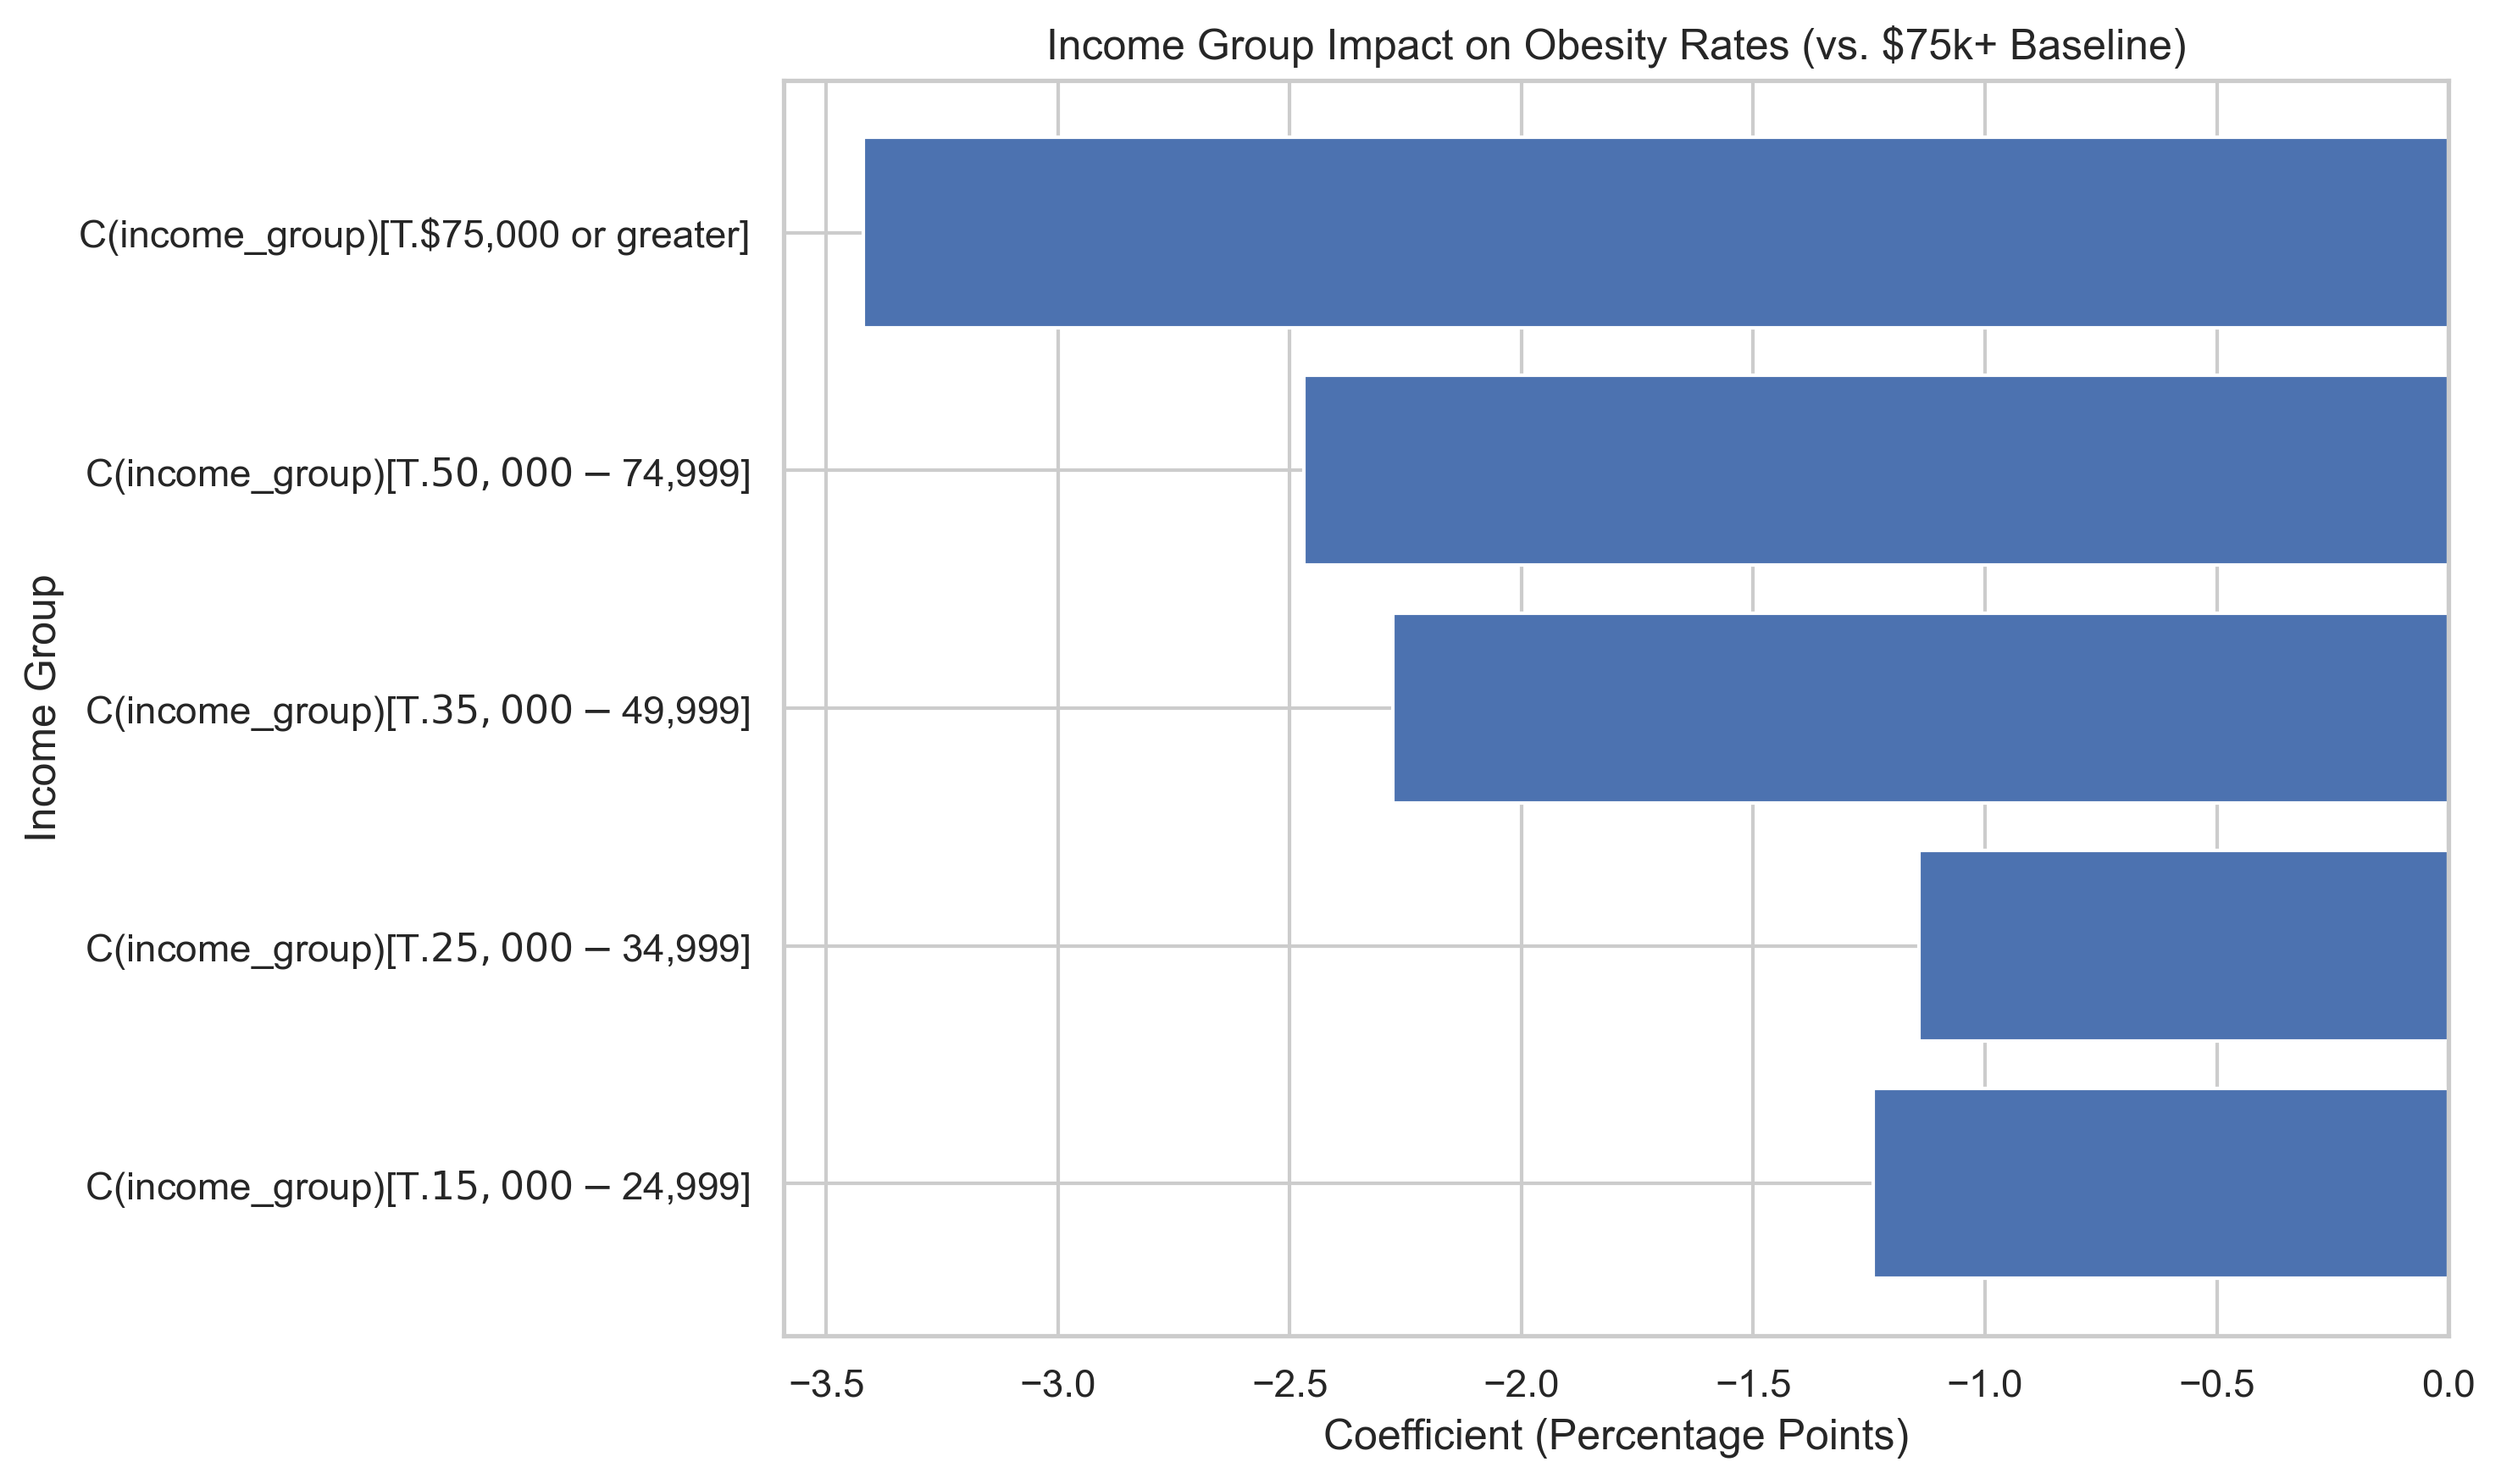

In [1087]:
income_df = obesity[obesity['stratification_category_1'] == 'Income']

## to balance that this is an income specific regression
## I filtered the data to only income
## then I created ordered categorical variables for the income groups
## model = data_value ~ C(income_group)

income_df = income_df.copy()
income_df['income_group'] = pd.Categorical(
    income_df['stratification_1'],
    categories=[
        'Less than $15,000', 
        '$15,000 - $24,999', 
        '$25,000 - $34,999', 
        '$35,000 - $49,999', 
        '$50,000 - $74,999', 
        '$75,000 or greater'
    ],
    ordered=True
)

# my model
model_income = smf.ols('data_value ~ C(income_group)', data=income_df).fit()
print(model_income.summary())

## other income groups have smaller coefficients, but are not significant
## plot shows them all visually
## lower income correlates with higher obesity

# plotting my coefficients
plt.figure(figsize=(10, 6))
coefs = model_income.params[1:]  # Exclude intercept
categories = model_income.model.exog_names[1:]
plt.barh(categories, coefs)
plt.title('Income Group Impact on Obesity Rates (vs. $75k+ Baseline)')
plt.xlabel('Coefficient (Percentage Points)')
plt.ylabel('Income Group')
plt.tight_layout()
plt.show()

* Less than 15k = +3.42% obesity rate, (p=0.001) Significant
* 15k-24k: +2.18% (p=0.03) Significant
* 25k-34k: +2.28% (p=0.024) Significant

* Model Fit: R-Squared=0.049; income explains 4.9% of obesity rate variability

* F-Statistic P-Value = 0.00764; Income groups collectively matter

* Lower income correlates with higher obesity rates.

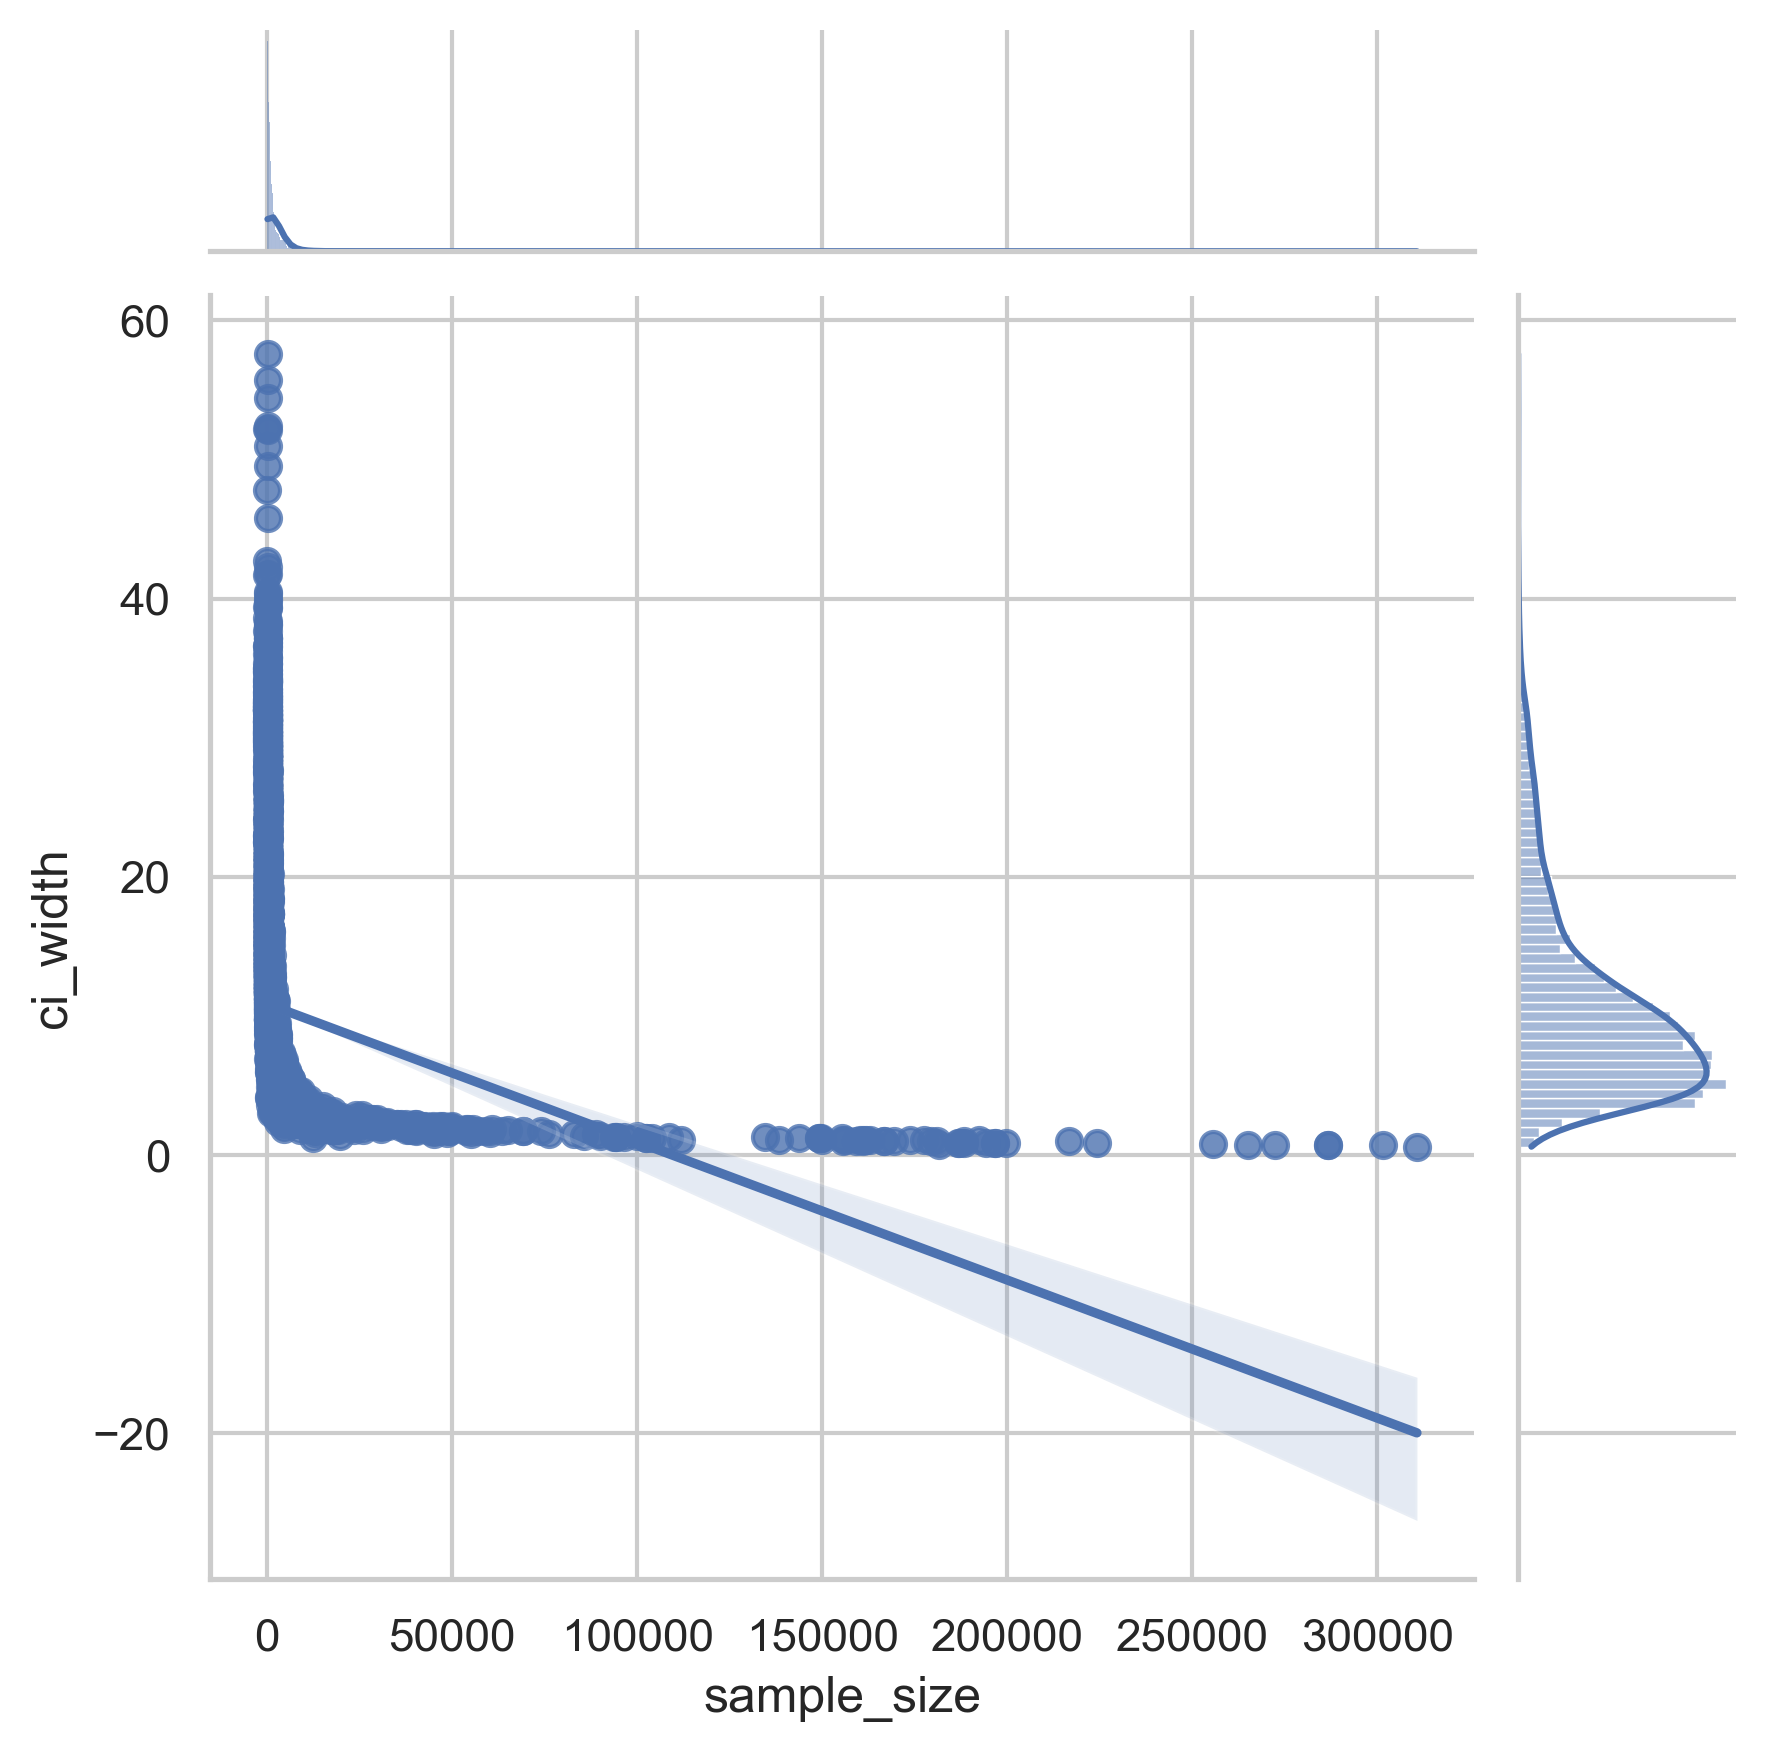

In [1088]:
# confidence interval width was easy,
# both confidence limits we're already included in data
df['ci_width'] = df['high_confidence_limit'] - df['low_confidence_limit']

# relationship between sample size and CI width
# regression line emphasizes the trend that precision increases 
## along with sample size, leads to tighter CI's
sns.jointplot(x='sample_size', y='ci_width', data=df, kind='reg')
plt.show()

* Negative relationship between CI width and sample size

* Larger sample sizes have less uncertainty


mixed_model = smf.mixedlm("data_value ~ C(stratification_1)", 
                         data=df, 
                         groups=df["location_desc"]).fit()
print(mixed_model.summary())

## mixed-effects, the model accounts for state level variance
## It's hard to interpret the effects without specific coefficients
## honestly I just feel like state-level variability exists and this can help adjust for it

Interpretation:
* scale = 143.37, variance between states. Significant

* Obesity rates vary by state, this model adjusts for that.

## 5. Discussion

Below every model I put an interpretation of data,
I also included the steps of what I was doing.

* Summarization: 
    * ANOVA wasn't significant
    * Income alone showed significant effects
    * Mixed model accounts for state differences, obesity rates can vary for multiple factors.
    * CI width analysis reinforces the sample size importance


* Final Notes:
    * Broad categories alone don't explain obesity differences
    * Income Regression (3-5% difference); lower income leads to higher obesity rates
    * Larger sample sizes reduce uncertainty
    * State-level variance is important